# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

## Tentang Dataset

**Sumber Dataset**
* Dataset yang digunakan bersumber dari public repository yaitu **Kaggle**
* Dataset berisi data harga perumahan di tangerang yang di peroleh dari website "Rumah.com"

**Isi Data**

* Dataset berisikan : **29420 baris** data harga rumah di tangerang
* dengan **7 kolom** yaitu :
    
    **Kategorikal**
    
    * nav-link href : link penjualan rumah
    
    * listing location : lokasi rumah yang dijual
    
    * listing-florarea : luas tanah
    
    * listing-florarea 2 : luas tanah permeter
    
    **Numerikal**
    
    * price : harga dari rumah yang dijual
    
    * bed : jumlah kamar tidur
    
    * bath : jumlah kamar mandi



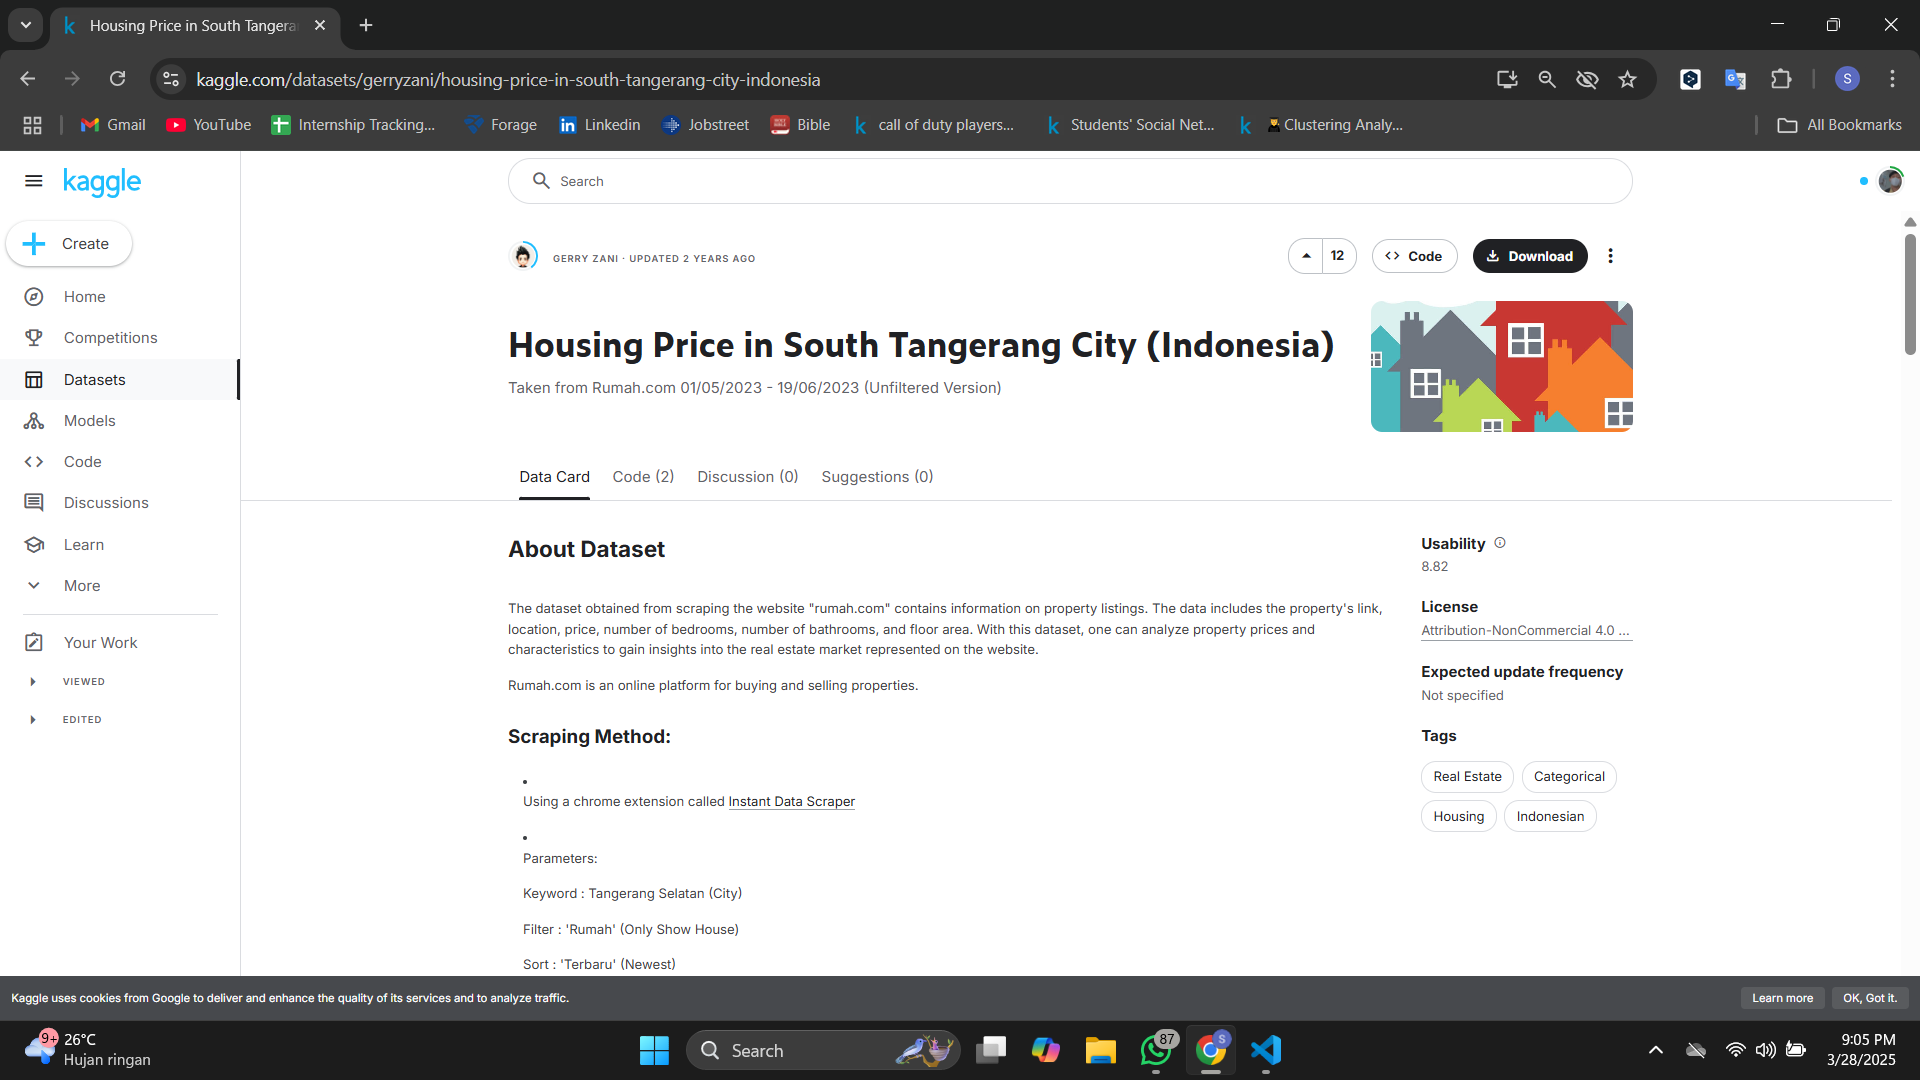

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.cluster import KMeans # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [3]:
df = pd.read_csv('Dataset/Dataset_inisiasi.csv', encoding='latin1')

In [4]:
df

,nav-link href,listing-location,price,bed,bath,listing-floorarea,listing-floorarea 2
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,Rp 20.720.721 per m²
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,Rp 12.747.875 per m²
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,Rp 30.859.375 per m²
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,Rp 18.333.333 per m²
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,Rp 27.777.778 per m²
...,...,...,...,...,...,...,...
29415,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten","3,3 M",3.0,3.0,300 m²,Rp 21.710.526 per m²
29416,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",4 M,8.0,4.0,330 m²,Rp 36.363.636 per m²
29417,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten","2,2 M",3.0,2.0,160 m²,Rp 18.333.333 per m²
29418,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten","1,95 M",3.0,2.0,120 m²,Rp 21.666.667 per m²


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29420 entries, 0 to 29419
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   nav-link href        29420 non-null  object 
 1   listing-location     29420 non-null  object 
 2   price                29420 non-null  object 
 3   bed                  29282 non-null  float64
 4   bath                 29215 non-null  float64
 5   listing-floorarea    29420 non-null  object 
 6   listing-floorarea 2  29383 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.6+ MB


**Isi Data**

* Dataset berisikan : **29420 baris** data harga rumah di tangerang
* dengan **7 kolom** yaitu :
    
    **Kategorikal**
    
    * nav-link href : link penjualan rumah
    
    * listing location : lokasi rumah yang dijual
    
    * listing-florarea : luas tanah
    
    * listing-florarea 2 : luas tanah permeter
    
    **Numerikal**
    
    * price : harga dari rumah yang dijual
    
    * bed : jumlah kamar tidur
    
    * bath : jumlah kamar mandi


In [6]:
print('jumlah data duplikat : ' , df.duplicated().sum())

jumlah data duplikat :  5241


In [7]:
print('jumlah data null/kosong : ')
df.isna().sum()

jumlah data null/kosong : 


nav-link href            0
listing-location         0
price                    0
bed                    138
bath                   205
listing-floorarea        0
listing-floorarea 2     37
dtype: int64

In [8]:
df.describe(include='all')

,nav-link href,listing-location,price,bed,bath,listing-floorarea,listing-floorarea 2
count,29420,29420,29420,29282.000000,29215.000000,29420,29383
unique,24179,8495,2116,NaN,NaN,533,5891
top,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten","3,5 M",NaN,NaN,200 m²,Rp 20.000.000 per m²
freq,5,4464,631,NaN,NaN,1349,417
mean,NaN,NaN,NaN,3.754457,2.986137,NaN,NaN
std,NaN,NaN,NaN,1.356762,1.359788,NaN,NaN
min,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN
50%,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN
75%,NaN,NaN,NaN,4.000000,4.000000,NaN,NaN


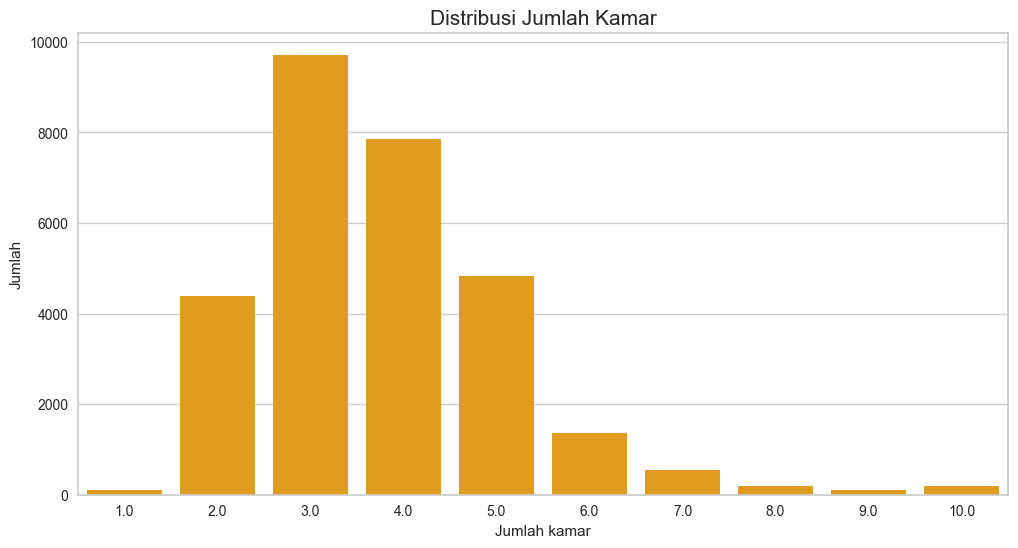

bed
9.0      100
1.0      103
10.0     186
8.0      196
7.0      538
6.0     1373
2.0     4380
5.0     4836
4.0     7853
3.0     9717
Name: count, dtype: int64


In [9]:
dist_kamar = df['bed'].value_counts().sort_values()
# Distribusi Jumlah Kamar
plt.figure(figsize=(12, 6))
sns.barplot(
    x = dist_kamar.index,
    y = dist_kamar.values,
    color= 'orange'
)
plt.title('Distribusi Jumlah Kamar', fontsize = 15)
plt.xlabel("Jumlah kamar")
plt.ylabel("Jumlah")
plt.show()

print(dist_kamar)

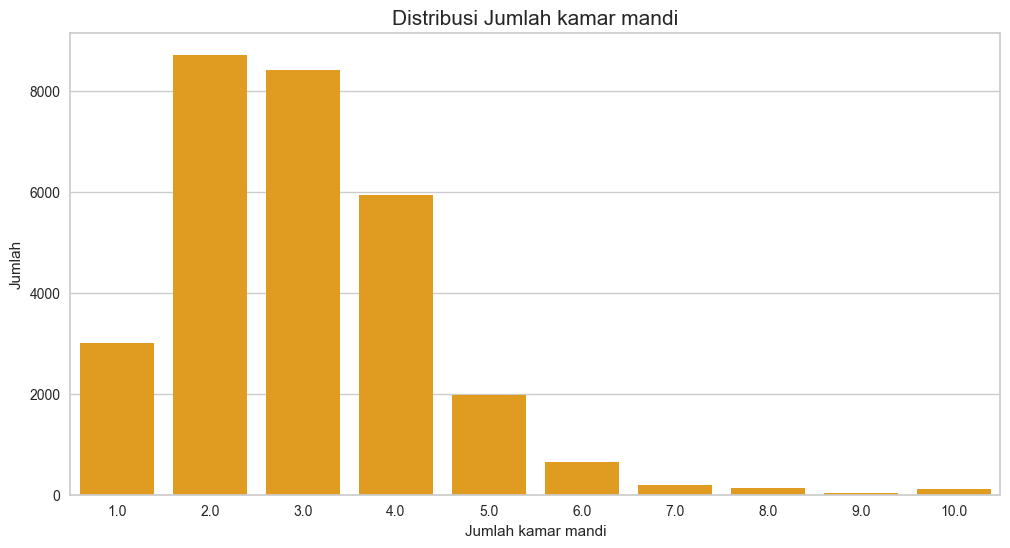

bath
9.0       34
10.0     116
8.0      139
7.0      195
6.0      655
5.0     1974
1.0     3016
4.0     5944
3.0     8421
2.0     8721
Name: count, dtype: int64


In [10]:
dist_kamarmandi = df['bath'].value_counts().sort_values()
# Distribusi Jumlah kamarmandi
plt.figure(figsize=(12, 6))
sns.barplot(
    x = dist_kamarmandi.index,
    y = dist_kamarmandi.values,
    color= 'orange'
)
plt.title('Distribusi Jumlah kamar mandi', fontsize = 15)
plt.xlabel("Jumlah kamar mandi")
plt.ylabel("Jumlah")
plt.show()

print(dist_kamarmandi)

**Profile data sementara :**
1. Terdapat 5241 baris data duplikat -> drop
2. Terdapat 138 null value di kolom kamar tidur, 205 di kolom kamar mandi & 37 di kolom harga permeter
3. kolom **lokasi_rumah** : terdapat 8495 lokasi penjualan rumah yang unik / bisa di katakan 8495 tempat berbeda - kolom ini akan di pisah (kecamatan, kabupaten, provinsi)
4. **harga** :  harga rumah paling sering muncul 3,5 miliar (631), dan ada 2116 harga berbeda
5. **jumlah_kamar** : jumlah kamar pada data memiliki rentang  1 - 10 kamar
6. **jumlah_kamarmandi** : jumlah kamar mandi pada data memiliki rentang  1 - 10 kamar
7. **luas_tanah** : luas tanah paling sering muncul 200m persegi (1349) 
7. **harga_permeter** : harga permeter paling sering muncul 20 juta per meter persegi



# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

**0. Rename kolom supaya mudah dibaca**

In [11]:
# Ganti Nama Kolom supaya lebih mudah dibaca
df = df.rename(columns={'nav-link href': 'link_penjualan', 'listing-location' : 'lokasi_rumah', 
                        'price' : 'harga', 'bed' : 'jumlah_kamar', 'bath' : 'jumlah_kamarmandi', 'listing-floorarea': 'luas_tanah', 'listing-floorarea 2': 'harga_permeter'})

**1. Handling Duplicate Values**

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

np.int64(0)

**2. Handling Null Values**

*Karena null values hanya sedikit maka kita drop saja*

In [14]:
df.dropna(inplace=True)

*Cek kembali*

In [15]:
df.isna().sum()

link_penjualan       0
lokasi_rumah         0
harga                0
jumlah_kamar         0
jumlah_kamarmandi    0
luas_tanah           0
harga_permeter       0
dtype: int64

In [16]:
df.describe(include='all')

,link_penjualan,lokasi_rumah,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,harga_permeter
count,23984,23984,23984,23984.000000,23984.000000,23984,23984
unique,23984,8428,2098,NaN,NaN,525,5847
top,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten","3,5 M",NaN,NaN,200 m²,Rp 20.000.000 per m²
freq,1,3616,520,NaN,NaN,1090,352
mean,NaN,NaN,NaN,3.757505,2.991870,NaN,NaN
std,NaN,NaN,NaN,1.352972,1.359394,NaN,NaN
min,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN
50%,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN
75%,NaN,NaN,NaN,4.000000,4.000000,NaN,NaN


***- okey data sudah bersih dari duplikat dan null sekarang manipulasi data per kolom***

**Manipulasi Kolom**

**1. Handling Kolom lokasi_rumah**

Bintaro, Tangerang Selatan, Banten -> bagi menjadi kecamatan kabupaten provinsi

In [17]:
df

,link_penjualan,lokasi_rumah,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,harga_permeter
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,Rp 20.720.721 per m²
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,Rp 12.747.875 per m²
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,Rp 30.859.375 per m²
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,Rp 18.333.333 per m²
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,Rp 27.777.778 per m²
...,...,...,...,...,...,...,...
29415,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten","3,3 M",3.0,3.0,300 m²,Rp 21.710.526 per m²
29416,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",4 M,8.0,4.0,330 m²,Rp 36.363.636 per m²
29417,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten","2,2 M",3.0,2.0,160 m²,Rp 18.333.333 per m²
29418,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten","1,95 M",3.0,2.0,120 m²,Rp 21.666.667 per m²


**- Ambil 3 kata terakhir pada kolom lokasi_rumah untuk mendapatkan kecamatan, kabupaten, dan provinsi**

In [18]:
# Pisahkan berdasarkan koma
df['split_lokasi'] = df['lokasi_rumah'].str.split(', ')

# Ambil 3 bagian terakhir (apapun panjangnya)
df['split_lokasi'] = df['split_lokasi'].apply(lambda x: x[-3:] if len(x) >= 3 else [None] * (3 - len(x)) + x)

# Ubah list jadi DataFrame dengan apply(pd.Series)
df[['kecamatan', 'kabupaten', 'provinsi']] = df['split_lokasi'].apply(pd.Series)

# Hapus kolom yang tidak perlu dan ganti nilai kosong dengan NaN
df = df.drop(columns=['split_lokasi']).fillna(np.nan)

# Cek hasilnya
df.head()

,link_penjualan,lokasi_rumah,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,harga_permeter,kecamatan,kabupaten,provinsi
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","6,9 M",5.0,5.0,420 m²,Rp 20.720.721 per m²,Gading Serpong,Tangerang Selatan,Banten
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","4,5 M",3.0,3.0,190 m²,Rp 12.747.875 per m²,Gading Serpong,Tangerang Selatan,Banten
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,95 M",3.0,3.0,132 m²,Rp 30.859.375 per m²,Gading Serpong,Tangerang Selatan,Banten
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,3 M",4.0,3.0,220 m²,Rp 18.333.333 per m²,Gading Serpong,Tangerang Selatan,Banten
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten","3,5 M",3.0,2.0,180 m²,Rp 27.777.778 per m²,Gading Serpong,Tangerang Selatan,Banten


**2. Handling Harga dari object menjadi numerik**

In [19]:
# Filter harga yang mengandung "jt" (jutaan)
df_juta = df[df['harga'].str.contains('(?i)jt', regex=True)]

# Hitung jumlah data rumah jutaan
print('Rumah Jutaan Ada:', df_juta.shape[0], 'Rumah')

Rumah Jutaan Ada: 3763 Rumah


In [20]:
df_miliar = df[df['harga'].str.contains('(?i) M', regex=True)]
print('Rumah Miliaran Ada:', df_miliar.shape[0], 'Rumah')


Rumah Miliaran Ada: 20126 Rumah


karena data masih objek jadi nanti gabisa digunakan lebih lanjut, jadi kita cek dulu ada berapa harga rumah yang jutaan dan miliaran sebelum kita convert ke numerik

1. Rumah Jutaann ada : **3763 Rumah**
2. Rumah Miliaran : **20126 Rumah**

In [21]:
def convert_to_numeric(harga):
    harga = harga.lower().replace(',', '.')  # Ubah koma ke titik
    if 'jt' in harga:
        return float(harga.replace(' jt', '')) * 1_000_000  # Jutaan
    elif 'm' in harga:
        return float(harga.replace(' m', '')) * 1_000_000_000  # Miliaran
    return None  # Kalau format tidak dikenali

# Terapkan ke dataframe
df['harga'] = df['harga'].apply(convert_to_numeric)

In [22]:
df

,link_penjualan,lokasi_rumah,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,harga_permeter,kecamatan,kabupaten,provinsi
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",6.900000e+09,5.0,5.0,420 m²,Rp 20.720.721 per m²,Gading Serpong,Tangerang Selatan,Banten
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",4.500000e+09,3.0,3.0,190 m²,Rp 12.747.875 per m²,Gading Serpong,Tangerang Selatan,Banten
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.950000e+09,3.0,3.0,132 m²,Rp 30.859.375 per m²,Gading Serpong,Tangerang Selatan,Banten
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.300000e+09,4.0,3.0,220 m²,Rp 18.333.333 per m²,Gading Serpong,Tangerang Selatan,Banten
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.500000e+09,3.0,2.0,180 m²,Rp 27.777.778 per m²,Gading Serpong,Tangerang Selatan,Banten
...,...,...,...,...,...,...,...,...,...,...
29415,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",3.300000e+09,3.0,3.0,300 m²,Rp 21.710.526 per m²,Bintaro,Tangerang Selatan,Banten
29416,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",4.000000e+09,8.0,4.0,330 m²,Rp 36.363.636 per m²,Bintaro,Tangerang Selatan,Banten
29417,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",2.200000e+09,3.0,2.0,160 m²,Rp 18.333.333 per m²,Bintaro,Tangerang Selatan,Banten
29418,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",1.950000e+09,3.0,2.0,120 m²,Rp 21.666.667 per m²,Bintaro,Tangerang Selatan,Banten


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23984 entries, 0 to 29419
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   link_penjualan     23984 non-null  object 
 1   lokasi_rumah       23984 non-null  object 
 2   harga              23889 non-null  float64
 3   jumlah_kamar       23984 non-null  float64
 4   jumlah_kamarmandi  23984 non-null  float64
 5   luas_tanah         23984 non-null  object 
 6   harga_permeter     23984 non-null  object 
 7   kecamatan          23984 non-null  object 
 8   kabupaten          23984 non-null  object 
 9   provinsi           23984 non-null  object 
dtypes: float64(3), object(7)
memory usage: 2.0+ MB


* *kolom harga sudah menjadi tipe data numerik*

In [24]:
df.describe(include='all')

,link_penjualan,lokasi_rumah,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,harga_permeter,kecamatan,kabupaten,provinsi
count,23984,23984,2.388900e+04,23984.000000,23984.000000,23984,23984,23984,23984,23984
unique,23984,8428,NaN,NaN,NaN,525,5847,17,1,1
top,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",NaN,NaN,NaN,200 m²,Rp 20.000.000 per m²,Bintaro,Tangerang Selatan,Banten
freq,1,3616,NaN,NaN,NaN,1090,352,8851,23984,23984
mean,NaN,NaN,3.602260e+09,3.757505,2.991870,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,7.255050e+09,1.352972,1.359394,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.050000e+06,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.380000e+09,3.000000,2.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.500000e+09,4.000000,3.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.350000e+09,4.000000,4.000000,NaN,NaN,NaN,NaN,NaN


* Cek distribusi Harga Rumah

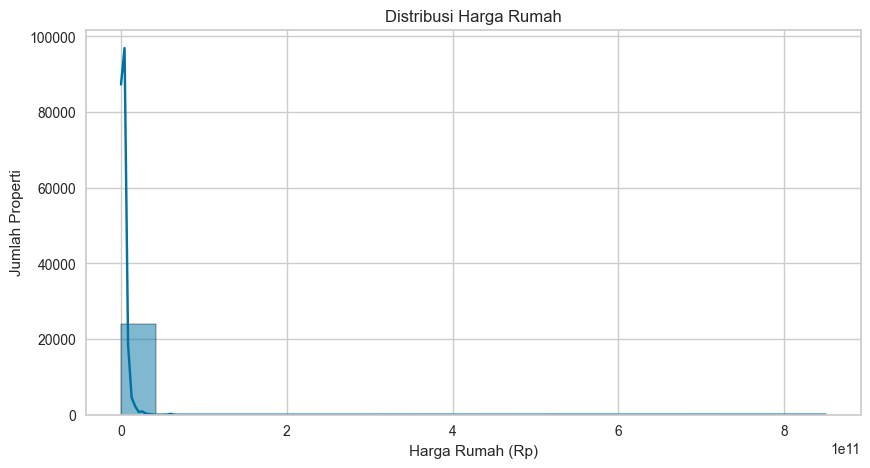

In [25]:
df['harga'] = df['harga'].astype(float)

# Plot histogram
plt.figure(figsize=(10,5))
sns.histplot(df['harga'], bins=20, kde=True)
plt.xlabel("Harga Rumah (Rp)")
plt.ylabel("Jumlah Properti")
plt.title("Distribusi Harga Rumah")
plt.show()


* harga rumah terdistribusi miring ke kiri & tidak distribusi normal

**Cek harga paling tinggi & paling rendah untuk di analisis**

In [26]:
print("Max:", df['harga'].max())
print("Min:", df['harga'].min())
print(df['harga'].describe())

Max: 850000000000.0
Min: 1050000.0
count    2.388900e+04
mean     3.602260e+09
std      7.255050e+09
min      1.050000e+06
25%      1.380000e+09
50%      2.500000e+09
75%      4.350000e+09
max      8.500000e+11
Name: harga, dtype: float64


* dapat dilihat pada data di atas, rumah paling rendah harganya adalah **satu jutaan** (kemungkinan ada kesalahan dalam processing sebelumnya) & yang paling tinggi adalah **850 miliar**

**Cek outlier pada data dengan IQR**

In [27]:
Q1 = df['harga'].quantile(0.25)
Q3 = df['harga'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Jumlah Outlier: {((df['harga'] < lower_bound) | (df['harga'] > upper_bound)).sum()}")


Q1: 1380000000.0, Q3: 4350000000.0, IQR: 2970000000.0
Lower Bound: -3075000000.0, Upper Bound: 8805000000.0
Jumlah Outlier: 1347


**Karena nilai iqr tidak wajar, jadi kita gunakan log transormation pada kolom harga untuk cek ulang outlier**

In [28]:
df["harga_log"] = np.log1p(df["harga"])

In [29]:
Q1 = df['harga_log'].quantile(0.25)
Q3 = df['harga_log'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
print(f"Jumlah Outlier: {((df['harga_log'] < lower_bound) | (df['harga_log'] > upper_bound)).sum()}")


Q1: 21.04534933684016, Q3: 22.193441682276887, IQR: 1.1480923454367264
Lower Bound: 19.32321081868507, Upper Bound: 23.915580200431975
Jumlah Outlier: 339


**dapat dilihat setalah menggunakan log tranformation, outlier menjadi 339, kita drop saja , karena jika tidak nanti clustering akan susah memisahkan data yang rentangnya sangat jauh dari distribusi normal (guassian)**

In [30]:
df = df[(df['harga_log'] >= lower_bound) & (df['harga_log'] <= upper_bound)]

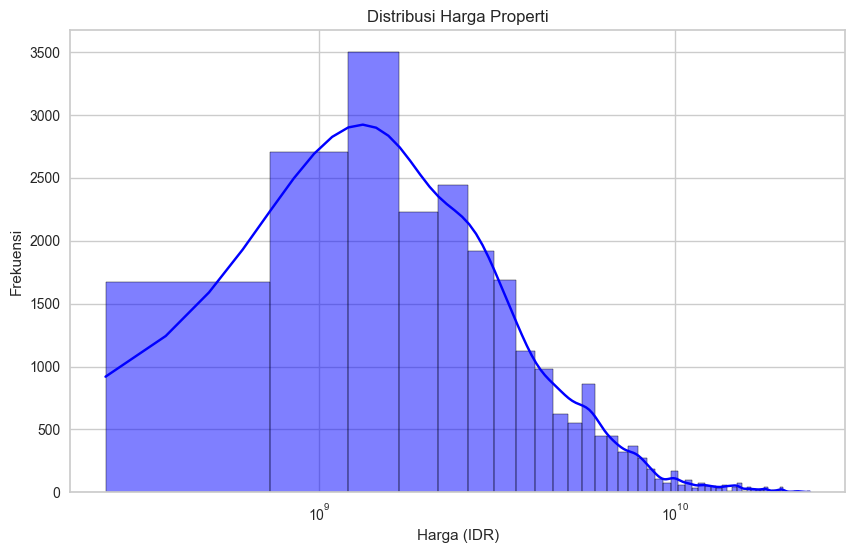

In [31]:
plt.figure(figsize=(10, 6))

# Histogram harga
sns.histplot(df["harga"], bins=50, kde=True, color="blue")

plt.xscale("log")  # Menggunakan log scale agar distribusi harga lebih jelas
plt.xlabel("Harga (IDR)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Harga Properti")
plt.show()

**Distribusi data sudah lebih mendingan daripada yang awal**

In [32]:
df.describe()

,harga,jumlah_kamar,jumlah_kamarmandi,harga_log
count,2.355000e+04,23550.000000,23550.000000,23550.000000
mean,3.364099e+09,3.752739,2.985435,21.615503
std,3.045457e+09,1.337345,1.333829,0.801196
min,2.500000e+08,1.000000,1.000000,19.336971
25%,1.400000e+09,3.000000,2.000000,21.059738
50%,2.500000e+09,4.000000,3.000000,21.639557
75%,4.300000e+09,4.000000,4.000000,22.181881
max,2.400000e+10,10.000000,10.000000,23.901320


**ok dapat dilihat sekarang data harga rumah cukup normal ya teman teman berada pada rentang  250 jutaan - 24 miliar**

**3. Handling Kolom Luas Tanah**

In [33]:
df['luas_tanah'] = df['luas_tanah'].str.replace('m²', '', regex=True).str.strip() # Ganti m2 jadi string kosong
df['luas_tanah'] = pd.to_numeric(df['luas_tanah'], errors='coerce') #convert tipe data jadi numerik

C:\Users\tugas\AppData\Local\Temp\ipykernel_26532\3088187687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['luas_tanah'] = df['luas_tanah'].str.replace('m²', '', regex=True).str.strip() # Ganti m2 jadi string kosong
C:\Users\tugas\AppData\Local\Temp\ipykernel_26532\3088187687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['luas_tanah'] = pd.to_numeric(df['luas_tanah'], errors='coerce') #convert tipe data jadi numerik


In [34]:
df

,link_penjualan,lokasi_rumah,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,harga_permeter,kecamatan,kabupaten,provinsi,harga_log
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",6.900000e+09,5.0,5.0,420,Rp 20.720.721 per m²,Gading Serpong,Tangerang Selatan,Banten,22.654787
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",4.500000e+09,3.0,3.0,190,Rp 12.747.875 per m²,Gading Serpong,Tangerang Selatan,Banten,22.227343
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.950000e+09,3.0,3.0,132,Rp 30.859.375 per m²,Gading Serpong,Tangerang Selatan,Banten,22.096981
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.300000e+09,4.0,3.0,220,Rp 18.333.333 per m²,Gading Serpong,Tangerang Selatan,Banten,21.917188
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.500000e+09,3.0,2.0,180,Rp 27.777.778 per m²,Gading Serpong,Tangerang Selatan,Banten,21.976029
...,...,...,...,...,...,...,...,...,...,...,...
29415,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",3.300000e+09,3.0,3.0,300,Rp 21.710.526 per m²,Bintaro,Tangerang Selatan,Banten,21.917188
29416,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",4.000000e+09,8.0,4.0,330,Rp 36.363.636 per m²,Bintaro,Tangerang Selatan,Banten,22.109560
29417,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",2.200000e+09,3.0,2.0,160,Rp 18.333.333 per m²,Bintaro,Tangerang Selatan,Banten,21.511723
29418,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",1.950000e+09,3.0,2.0,120,Rp 21.666.667 per m²,Bintaro,Tangerang Selatan,Banten,21.391095


ok manipulasi kolom semuanya sudah beres

*notes : karena harga permeter tidak menjadi patokan untuk modelling, jadi saya biarkan saja ya ges hehe.*

**Cek Ulang Data**

Berikutnya adalah kita cek ulang datanya dan lihat distribusi datanya juga

In [35]:
df.isna().sum()

link_penjualan       0
lokasi_rumah         0
harga                0
jumlah_kamar         0
jumlah_kamarmandi    0
luas_tanah           0
harga_permeter       0
kecamatan            0
kabupaten            0
provinsi             0
harga_log            0
dtype: int64

In [36]:
df.duplicated().sum()

np.int64(0)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23550 entries, 0 to 29419
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   link_penjualan     23550 non-null  object 
 1   lokasi_rumah       23550 non-null  object 
 2   harga              23550 non-null  float64
 3   jumlah_kamar       23550 non-null  float64
 4   jumlah_kamarmandi  23550 non-null  float64
 5   luas_tanah         23550 non-null  int64  
 6   harga_permeter     23550 non-null  object 
 7   kecamatan          23550 non-null  object 
 8   kabupaten          23550 non-null  object 
 9   provinsi           23550 non-null  object 
 10  harga_log          23550 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 2.2+ MB


In [38]:
df.describe(include='all')

,link_penjualan,lokasi_rumah,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,harga_permeter,kecamatan,kabupaten,provinsi,harga_log
count,23550,23550,2.355000e+04,23550.000000,23550.000000,23550.000000,23550,23550,23550,23550,23550.000000
unique,23550,8265,NaN,NaN,NaN,NaN,5625,17,1,1,NaN
top,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",NaN,NaN,NaN,NaN,Rp 20.000.000 per m²,Bintaro,Tangerang Selatan,Banten,NaN
freq,1,3594,NaN,NaN,NaN,NaN,351,8768,23550,23550,NaN
mean,NaN,NaN,3.364099e+09,3.752739,2.985435,207.251932,NaN,NaN,NaN,NaN,21.615503
std,NaN,NaN,3.045457e+09,1.337345,1.333829,2755.930725,NaN,NaN,NaN,NaN,0.801196
min,NaN,NaN,2.500000e+08,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,19.336971
25%,NaN,NaN,1.400000e+09,3.000000,2.000000,80.000000,NaN,NaN,NaN,NaN,21.059738
50%,NaN,NaN,2.500000e+09,4.000000,3.000000,140.000000,NaN,NaN,NaN,NaN,21.639557
75%,NaN,NaN,4.300000e+09,4.000000,4.000000,234.000000,NaN,NaN,NaN,NaN,22.181881


*hmm sepertinya ada data anomali yang ada di kolom luas tanah*

In [39]:
df[df['luas_tanah'] <= 100000].sort_values(by='luas_tanah', ascending= False)

,link_penjualan,lokasi_rumah,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,harga_permeter,kecamatan,kabupaten,provinsi,harga_log
27781,https://www.rumah.com/listing-properti/dijual-...,"Ciputat, Tangerang Selatan, Banten",2.500000e+09,4.0,4.0,88300,Rp 7.812.500 per m²,Ciputat,Tangerang Selatan,Banten,21.639557
19381,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Bintaro, Tangerang Selatan, Banten",4.800000e+09,4.0,5.0,25015,Rp 30.000.000 per m²,Bintaro,Tangerang Selatan,Banten,22.291882
6730,https://www.rumah.com/listing-properti/dijual-...,"BALI VIEW9, Ciputat Timur, Tangerang Selatan,...",2.950000e+09,3.0,2.0,13000,Rp 10.925.926 per m²,Ciputat Timur,Tangerang Selatan,Banten,21.805071
3514,https://www.rumah.com/listing-properti/dijual-...,"Kencana Loka, BSD, Tangerang Selatan, Banten",4.500000e+09,5.0,6.0,3000,Rp 22.500.000 per m²,BSD,Tangerang Selatan,Banten,22.227343
26709,https://www.rumah.com/listing-properti/dijual-...,"Ciputat Bintaro, Ciputat, Tangerang Selatan, B...",2.700000e+09,4.0,3.0,2140,Rp 12.857.143 per m²,Ciputat,Tangerang Selatan,Banten,21.716518
...,...,...,...,...,...,...,...,...,...,...,...
10679,https://www.rumah.com/listing-properti/dijual-...,"pamulang barat, Pamulang, Tangerang Selatan, B...",2.300000e+09,4.0,3.0,1,Rp 17.293.233 per m²,Pamulang,Tangerang Selatan,Banten,21.556175
11714,https://www.rumah.com/listing-properti/dijual-...,"Jl.kihajar dewantara kampung sawah ciputat, Bi...",1.400000e+09,3.0,3.0,1,Rp 14.141.414 per m²,Bintaro,Tangerang Selatan,Banten,21.059738
14295,https://www.rumah.com/listing-properti/dijual-...,"vila bintaro indah Tanggerang selatan, Bintaro...",1.500000e+09,2.0,2.0,1,Rp 9.375.000 per m²,Bintaro,Tangerang Selatan,Banten,21.128731
28787,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",1.500000e+09,2.0,3.0,1,Rp 31.250.000 per m²,Gading Serpong,Tangerang Selatan,Banten,21.128731


**cek distribusi luas tanah dan harganya**

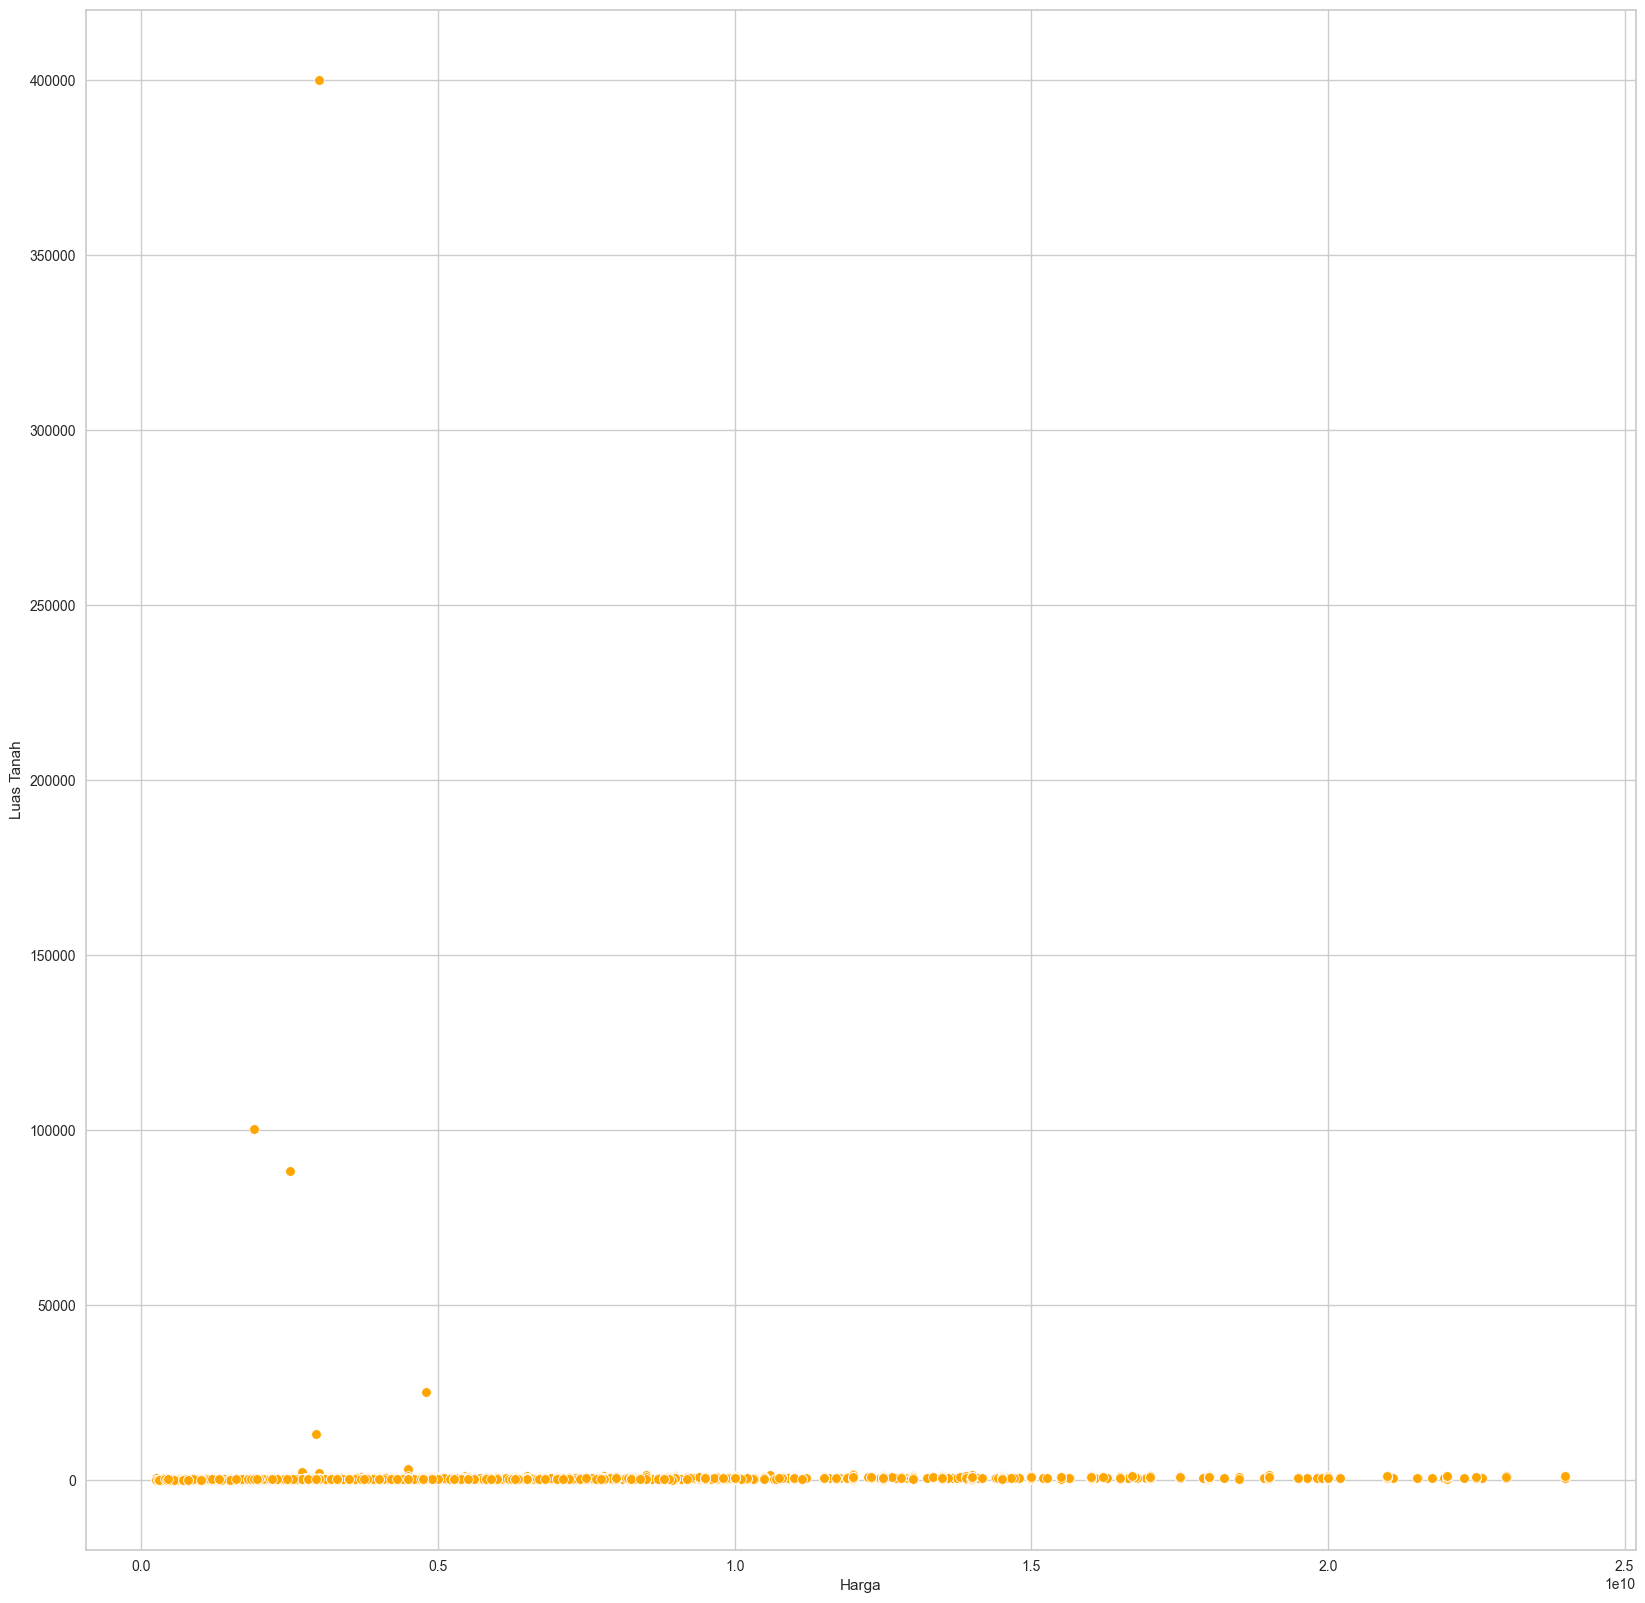

In [40]:
plt.figure(figsize=(20,20))
sns.scatterplot(
    data= df,
    x ='harga',
    y= 'luas_tanah',
    color = 'orange'
)
plt.xlabel("Harga")
plt.ylabel("Luas Tanah")
plt.show()

In [41]:
df['luas_tanah'].nlargest(10)

17321    400000
20987    100150
27781     88300
19381     25015
6730      13000
3514       3000
26709      2140
11283      2000
95         1600
5419       1300
Name: luas_tanah, dtype: int64

In [42]:
df[df['luas_tanah'] == 400000]

,link_penjualan,lokasi_rumah,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,harga_permeter,kecamatan,kabupaten,provinsi,harga_log
17321,https://www.rumah.com/listing-properti/dijual-...,"Ciputat Timur, Tangerang Selatan, Banten",3.000000e+09,6.0,4.0,400000,Rp 12.000.000 per m²,Ciputat Timur,Tangerang Selatan,Banten,21.821878


In [43]:
df[df['luas_tanah'] == 3000]

,link_penjualan,lokasi_rumah,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,harga_permeter,kecamatan,kabupaten,provinsi,harga_log
3514,https://www.rumah.com/listing-properti/dijual-...,"Kencana Loka, BSD, Tangerang Selatan, Banten",4.500000e+09,5.0,6.0,3000,Rp 22.500.000 per m²,BSD,Tangerang Selatan,Banten,22.227343


ok sepertinya masih ada data yang tidak normal, yang bener aja masa ada jualan rumah luas tanah 400 ribu meter persegi dengan harga 3m saja :D, berdasarkan visual yang ditampilkan dan data yang saya telusuri, saya akan menghapus data yang luas tanahnya lebih dari 3000 meter persegi 

In [44]:
df = df[df['luas_tanah'] <= 3000]

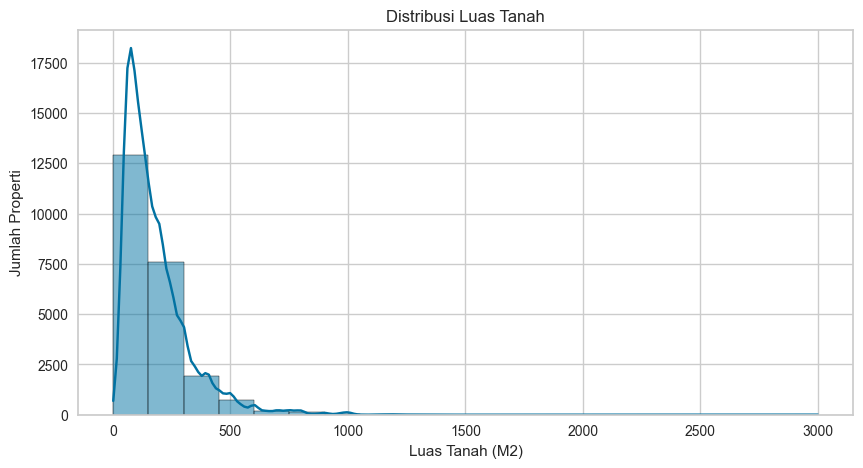

In [45]:
# Plot histogram
plt.figure(figsize=(10,5))
sns.histplot(df['luas_tanah'], bins=20, kde=True)
plt.xlabel("Luas Tanah (M2)")
plt.ylabel("Jumlah Properti")
plt.title("Distribusi Luas Tanah")
plt.show()

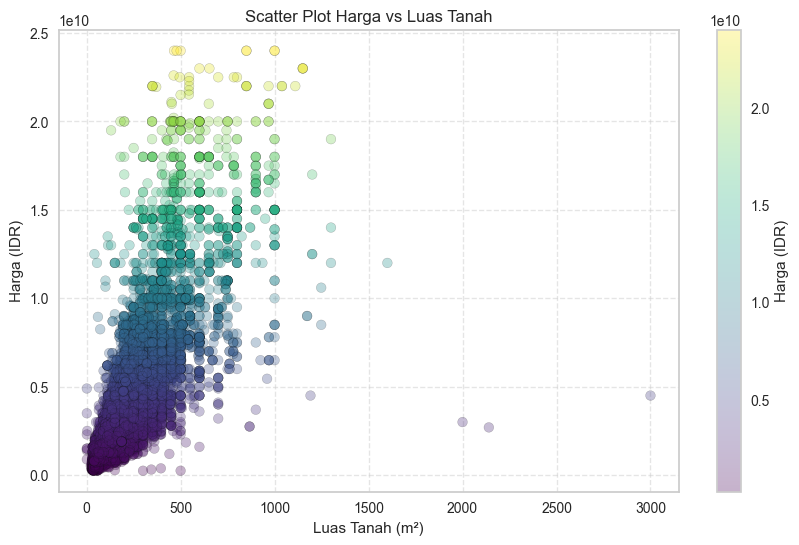

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(df['luas_tanah'], df['harga'], alpha=0.3, c=df['harga'], cmap='viridis', edgecolor='k')

plt.xlabel("Luas Tanah (m²)")
plt.ylabel("Harga (IDR)")
plt.title("Scatter Plot Harga vs Luas Tanah")

plt.colorbar(label="Harga (IDR)")  # Menambahkan colorbar untuk harga
plt.grid(True, linestyle="--", alpha=0.5)  # Menambahkan grid agar lebih mudah dibaca
plt.show()


**Mengecek rata-rata harga rumah per kecamatan**

In [47]:
harga_kecamatan = df.groupby('kecamatan')['harga'].mean().sort_values(ascending= False)

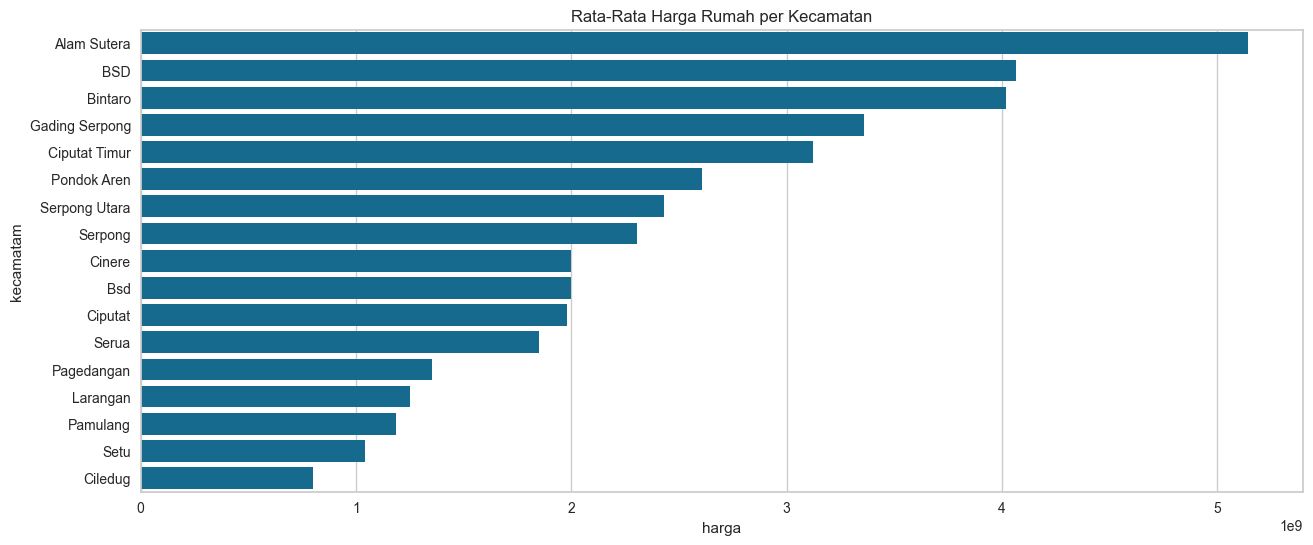

kecamatan
Alam Sutera       5.140115e+09
BSD               4.064687e+09
Bintaro           4.020309e+09
Gading Serpong    3.359027e+09
Ciputat Timur     3.123301e+09
Pondok Aren       2.606312e+09
Serpong Utara     2.431697e+09
Serpong           2.302946e+09
Cinere            2.000000e+09
Bsd               2.000000e+09
Ciputat           1.978366e+09
Serua             1.850000e+09
Pagedangan        1.353867e+09
Larangan          1.250000e+09
Pamulang          1.188287e+09
Setu              1.040964e+09
Ciledug           8.000000e+08
Name: harga, dtype: float64

In [48]:
plt.figure(figsize=(15,6))
sns.barplot(
    x= harga_kecamatan.values,
    y =harga_kecamatan.index
)
plt.title('Rata-Rata Harga Rumah per Kecamatan')
plt.xlabel('harga')
plt.ylabel('kecamatam')
plt.show()

harga_kecamatan


okey berdasarkan data harga rata-rata rumah tertinggi adalah di Alam Sutera dengan harga 5,1m :D (kira kira gen z bisa punya rumah ga ya? huhuhu), dan yang paling rendah ada di ciledug dengan rata-rata 800juta

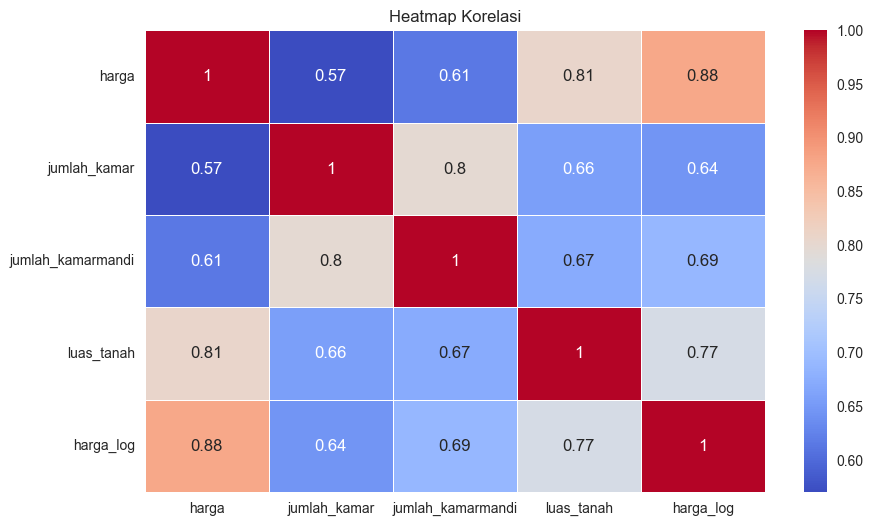

In [49]:
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Heatmap Korelasi")
plt.show()


dilihat berdasarkan heatmap korelasi, korelasi antar kolom tertinggi adalah
1. Jumlah kamar & jumlah kamar mandi -> 0,8 --> sangat bergantungan (kemungkinan kolom jumlah kamar saja yang akan digunakan dalam clustering)
2. Luas Tanah & (Jumlah kamar & jumlah kamar mandi) -> 0,64 -> sangat bergantungan 
3. Luas tanah & harga -> 0.81 -> sangat bergantungan

**Encoding Kolom Kategorikal**

In [50]:
df_copy = df.copy()
df_copy

,link_penjualan,lokasi_rumah,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,harga_permeter,kecamatan,kabupaten,provinsi,harga_log
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",6.900000e+09,5.0,5.0,420,Rp 20.720.721 per m²,Gading Serpong,Tangerang Selatan,Banten,22.654787
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",4.500000e+09,3.0,3.0,190,Rp 12.747.875 per m²,Gading Serpong,Tangerang Selatan,Banten,22.227343
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.950000e+09,3.0,3.0,132,Rp 30.859.375 per m²,Gading Serpong,Tangerang Selatan,Banten,22.096981
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.300000e+09,4.0,3.0,220,Rp 18.333.333 per m²,Gading Serpong,Tangerang Selatan,Banten,21.917188
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.500000e+09,3.0,2.0,180,Rp 27.777.778 per m²,Gading Serpong,Tangerang Selatan,Banten,21.976029
...,...,...,...,...,...,...,...,...,...,...,...
29415,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",3.300000e+09,3.0,3.0,300,Rp 21.710.526 per m²,Bintaro,Tangerang Selatan,Banten,21.917188
29416,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",4.000000e+09,8.0,4.0,330,Rp 36.363.636 per m²,Bintaro,Tangerang Selatan,Banten,22.109560
29417,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",2.200000e+09,3.0,2.0,160,Rp 18.333.333 per m²,Bintaro,Tangerang Selatan,Banten,21.511723
29418,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",1.950000e+09,3.0,2.0,120,Rp 21.666.667 per m²,Bintaro,Tangerang Selatan,Banten,21.391095


**- Ambil kolom selain link penjualan dan lokasi rumah untuk pemodelan Clustering**
: *karena kemungkinan tidak akan berpengaruh dalam pemodelan*

In [51]:
df 

,link_penjualan,lokasi_rumah,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,harga_permeter,kecamatan,kabupaten,provinsi,harga_log
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",6.900000e+09,5.0,5.0,420,Rp 20.720.721 per m²,Gading Serpong,Tangerang Selatan,Banten,22.654787
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",4.500000e+09,3.0,3.0,190,Rp 12.747.875 per m²,Gading Serpong,Tangerang Selatan,Banten,22.227343
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.950000e+09,3.0,3.0,132,Rp 30.859.375 per m²,Gading Serpong,Tangerang Selatan,Banten,22.096981
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.300000e+09,4.0,3.0,220,Rp 18.333.333 per m²,Gading Serpong,Tangerang Selatan,Banten,21.917188
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.500000e+09,3.0,2.0,180,Rp 27.777.778 per m²,Gading Serpong,Tangerang Selatan,Banten,21.976029
...,...,...,...,...,...,...,...,...,...,...,...
29415,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",3.300000e+09,3.0,3.0,300,Rp 21.710.526 per m²,Bintaro,Tangerang Selatan,Banten,21.917188
29416,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",4.000000e+09,8.0,4.0,330,Rp 36.363.636 per m²,Bintaro,Tangerang Selatan,Banten,22.109560
29417,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",2.200000e+09,3.0,2.0,160,Rp 18.333.333 per m²,Bintaro,Tangerang Selatan,Banten,21.511723
29418,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",1.950000e+09,3.0,2.0,120,Rp 21.666.667 per m²,Bintaro,Tangerang Selatan,Banten,21.391095


In [52]:
df_copy = df_copy.iloc[:, 2:11]

In [53]:
df_copy

,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,harga_permeter,kecamatan,kabupaten,provinsi,harga_log
0,6.900000e+09,5.0,5.0,420,Rp 20.720.721 per m²,Gading Serpong,Tangerang Selatan,Banten,22.654787
1,4.500000e+09,3.0,3.0,190,Rp 12.747.875 per m²,Gading Serpong,Tangerang Selatan,Banten,22.227343
2,3.950000e+09,3.0,3.0,132,Rp 30.859.375 per m²,Gading Serpong,Tangerang Selatan,Banten,22.096981
3,3.300000e+09,4.0,3.0,220,Rp 18.333.333 per m²,Gading Serpong,Tangerang Selatan,Banten,21.917188
4,3.500000e+09,3.0,2.0,180,Rp 27.777.778 per m²,Gading Serpong,Tangerang Selatan,Banten,21.976029
...,...,...,...,...,...,...,...,...,...
29415,3.300000e+09,3.0,3.0,300,Rp 21.710.526 per m²,Bintaro,Tangerang Selatan,Banten,21.917188
29416,4.000000e+09,8.0,4.0,330,Rp 36.363.636 per m²,Bintaro,Tangerang Selatan,Banten,22.109560
29417,2.200000e+09,3.0,2.0,160,Rp 18.333.333 per m²,Bintaro,Tangerang Selatan,Banten,21.511723
29418,1.950000e+09,3.0,2.0,120,Rp 21.666.667 per m²,Bintaro,Tangerang Selatan,Banten,21.391095


In [54]:
le = LabelEncoder()

for col in df_copy.select_dtypes(include=['object', 'category']).columns:
    df_copy[col] = le.fit_transform(df_copy[col])

In [55]:
df_copy.sample(10)

,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,harga_permeter,kecamatan,kabupaten,provinsi,harga_log
10397,6.200000e+09,4.0,5.0,400,2982,2,0,0,22.547815
11511,8.400000e+09,7.0,5.0,343,3259,2,0,0,22.851498
13159,2.300000e+09,4.0,3.0,110,3655,2,0,0,21.556175
3660,2.850000e+09,4.0,3.0,210,2711,2,0,0,21.770585
14431,1.200000e+09,2.0,2.0,85,1509,2,0,0,20.905587
21671,1.500000e+09,4.0,2.0,90,1673,11,0,0,21.128731
28648,3.700000e+09,4.0,3.0,150,4020,2,0,0,22.031599
11985,2.289000e+09,5.0,4.0,152,1143,6,0,0,21.551381
20740,2.800000e+09,5.0,3.0,300,866,6,0,0,21.752885
9877,5.000000e+08,2.0,1.0,36,5018,11,0,0,20.030119


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

**Clustering akan menggunakan Algoritma Kmeans, oleh karena itu kita perlu import Kmeans terlebih dahulu, dan hasilnya akan ada di section berikutnya**

In [56]:
inertia = []
K = range(1, 11)  # Coba dari 1 sampai 10 cluster

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_copy)
    inertia.append(kmeans.inertia_)  # Simpan inertia tiap jumlah cluster

c:\Users\tugas\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\tugas\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\tugas\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\tugas\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

**1. Elbow Method**

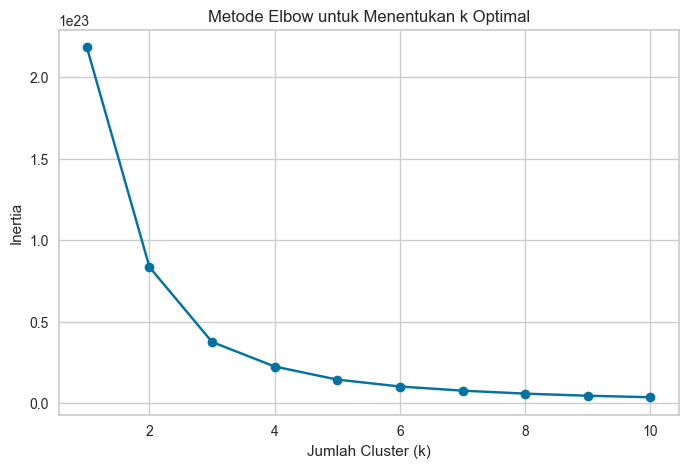

In [57]:

# Plot hasil Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.show()


**2. Gunakan Cluster pada Elbow Method dan cek Silhouettte Score**

In [58]:
optimal_k = 3
kmeans_optimal = KMeans(n_clusters= optimal_k, random_state=42, n_init=10)
clusters = kmeans_optimal.fit_predict(df_copy)

silhouette_avg = silhouette_score(df_copy, clusters)
print(f"Silhouette Score untuk k={optimal_k}: {silhouette_avg:.3f}")

Silhouette Score untuk k=3: 0.652


**Hasil sudah bagus dengan Silhoute Score mencapai : 0,652, tetapi saya belum melakukan feature scalling untuk datanya dan belum melakukan eksplorasi feature selection. jadi saya akan melakukan eksperimen dan membandingkan semua eksperimen untuk mendapatkan nilai silhouette score terbaik yang akan digunakan untuk pemodelan akhir**

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

### **Clustering dengan 5 kolom (harga, jumlah_kamar, jumlah_kamarmandi, luas_tanah, kecamatan_encode)**

In [59]:
features = df_copy.iloc[:, [0,1,2,3,5]]

In [60]:
features

,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,kecamatan
0,6.900000e+09,5.0,5.0,420,8
1,4.500000e+09,3.0,3.0,190,8
2,3.950000e+09,3.0,3.0,132,8
3,3.300000e+09,4.0,3.0,220,8
4,3.500000e+09,3.0,2.0,180,8
...,...,...,...,...,...
29415,3.300000e+09,3.0,3.0,300,2
29416,4.000000e+09,8.0,4.0,330,2
29417,2.200000e+09,3.0,2.0,160,2
29418,1.950000e+09,3.0,2.0,120,2


**1. Clustering dengan features Scalling**

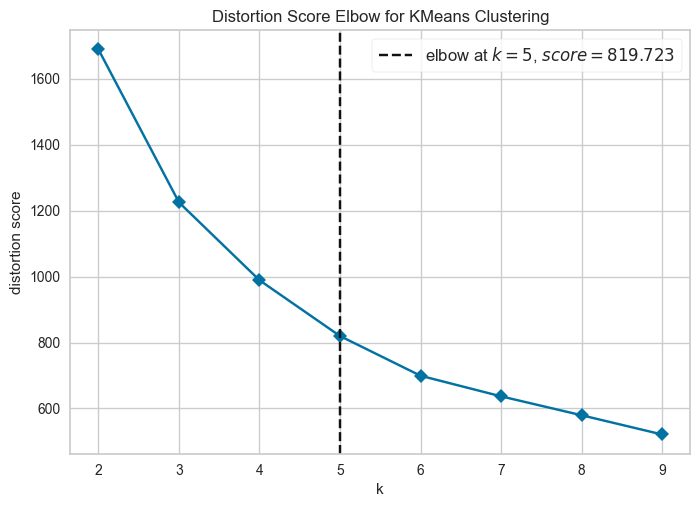

Silhouette Score untuk k=5: 0.380


In [61]:
#Menggunakan Min Max Scaller (Normalisasi) karena data tidak terdistribusi normal
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# 🔹 4. Gunakan KElbowVisualizer untuk mencari jumlah cluster optimal
kmeans = KMeans(random_state=42, n_init=10)

visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric="distortion", timings=False)
visualizer.fit(features_scaled)  # 🔥 Gunakan data yang sudah dinormalisasi
visualizer.show()

# 🔹 5. Ambil jumlah cluster optimal dari Elbow
optimal_k = visualizer.elbow_value_

# 🔹 6. Jalankan K-Means dengan jumlah cluster optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_optimal.fit_predict(features_scaled)

# 🔹 7. Evaluasi Silhouette Score
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f"Silhouette Score untuk k={optimal_k}: {silhouette_avg:.3f}")

**ok malah lebih buruk guys, dibandingkan dengan yang tidak di scalling, mungkin karena rentang jumlah kamar & jumlah kamar mandi tidak terlalu jauh, jadi step selanjutnya adalah mencoba scalling harganya saja**

**2. Clustering dengan features Scalling kolom Harga**

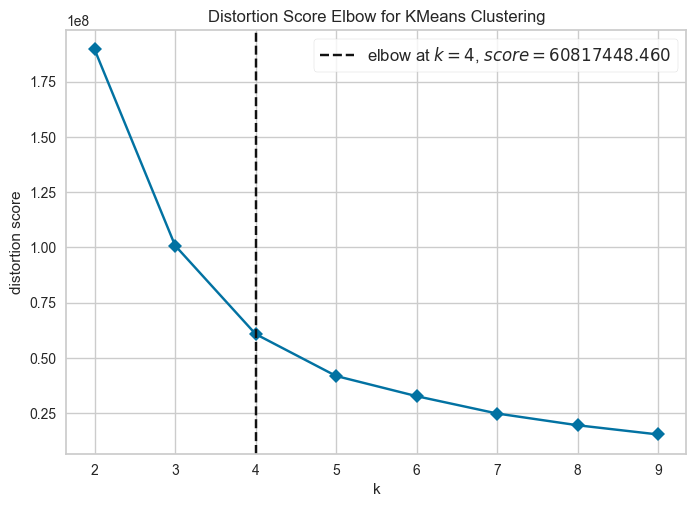

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
# Buat salinan data asli
features_scaled = features.copy()  

# 🔹 Scaling hanya untuk kolom 'harga'
scaler = MinMaxScaler()
features_scaled[['harga']] = scaler.fit_transform(features[['harga']])  # ✅ Fix indexing

# 🔹 Gunakan KElbowVisualizer untuk menentukan jumlah cluster optimal
kmeans = KMeans(random_state=42, n_init=10)

visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric="distortion", timings=False)
visualizer.fit(features_scaled)  # 🔥 Gunakan data yang sudah di-scale
visualizer.show()


In [63]:
# 🔹 5. Ambil jumlah cluster optimal dari Elbow
optimal_k = visualizer.elbow_value_

# 🔹 6. Jalankan K-Means dengan jumlah cluster optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_optimal.fit_predict(features_scaled)

# 🔹 7. Evaluasi Silhouette Score
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f"Silhouette Score untuk k={optimal_k}: {silhouette_avg:.3f}")

Silhouette Score untuk k=4: 0.608


ok disini sedikit naik ya teman teman Silhouette Score untuk k= 4: 0.608, tapi coba experimen lagi dengan luas tanahnya juga di scalling

**3. Clustering dengan features Scalling kolom Harga & luas_tanah**


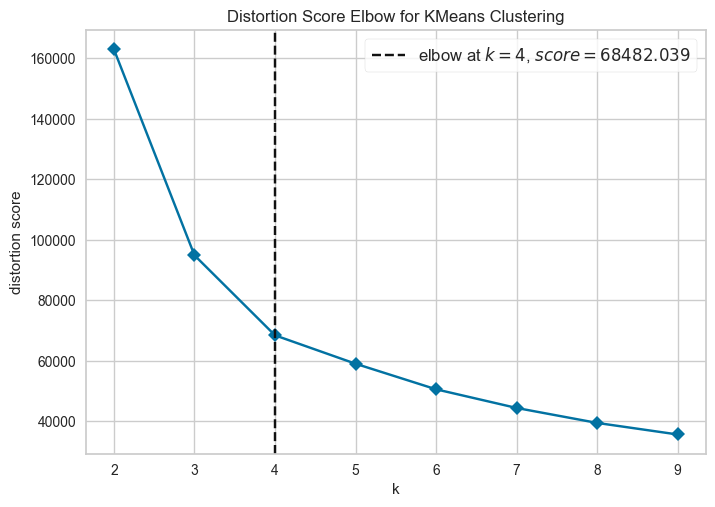

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [64]:
# Buat salinan data asli
features_scaled = features.copy()  

# 🔹 Scaling hanya untuk kolom 'harga'
scaler = MinMaxScaler()
features_scaled[['harga','luas_tanah']] = scaler.fit_transform(features[['harga', 'luas_tanah']])  

# 🔹 Gunakan KElbowVisualizer untuk menentukan jumlah cluster optimal
kmeans = KMeans(random_state=42, n_init=10)

visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric="distortion", timings=False)
visualizer.fit(features_scaled)  # 🔥 Gunakan data yang sudah di-scale
visualizer.show()


In [65]:
# 🔹 5. Ambil jumlah cluster optimal dari Elbow
optimal_k = visualizer.elbow_value_

# 🔹 6. Jalankan K-Means dengan jumlah cluster optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_optimal.fit_predict(features_scaled)

# 🔹 7. Evaluasi Silhouette Score
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f"Silhouette Score untuk k={optimal_k}: {silhouette_avg:.3f}")

Silhouette Score untuk k=4: 0.482


hasilnya tidak sebaik yang tidak di scalling dan di scalling harga, tapi mari kita lanjutkan eksperimen 

### **Clustering dengan 4 kolom (harga, jumlah_kamar, luas_tanah, kecamatan_encode)**

In [66]:
features = features.drop(columns='jumlah_kamarmandi')

In [67]:
features

,harga,jumlah_kamar,luas_tanah,kecamatan
0,6.900000e+09,5.0,420,8
1,4.500000e+09,3.0,190,8
2,3.950000e+09,3.0,132,8
3,3.300000e+09,4.0,220,8
4,3.500000e+09,3.0,180,8
...,...,...,...,...
29415,3.300000e+09,3.0,300,2
29416,4.000000e+09,8.0,330,2
29417,2.200000e+09,3.0,160,2
29418,1.950000e+09,3.0,120,2


**1. Clustering Tanpa Scalling**

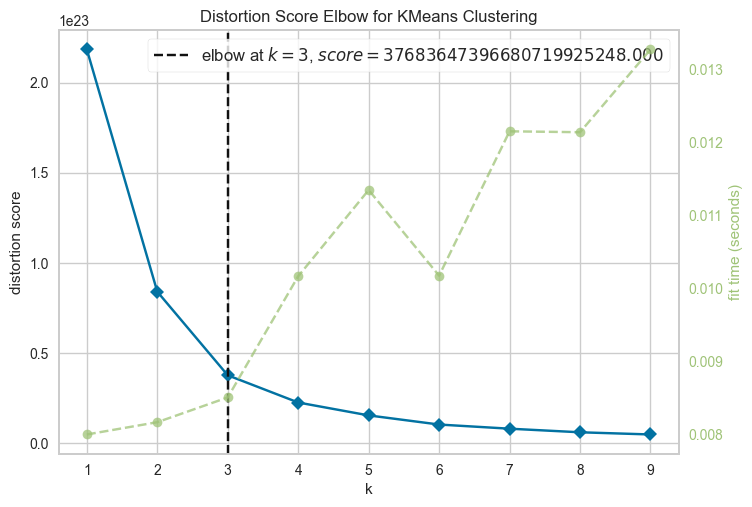

Silhouette Score untuk k=3: 0.652


In [68]:
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(features)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

optimal_k = visualizer.elbow_value_

# 🔹 6. Jalankan K-Means dengan jumlah cluster optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_optimal.fit_predict(features)

# 🔹 7. Evaluasi Silhouette Score
silhouette_avg = silhouette_score(features, clusters)
print(f"Silhouette Score untuk k={optimal_k}: {silhouette_avg:.3f}")

Hasilnya sama dengan Clustering pertama yang tanpa di scalling

**2. Clustering dengan Scalling**

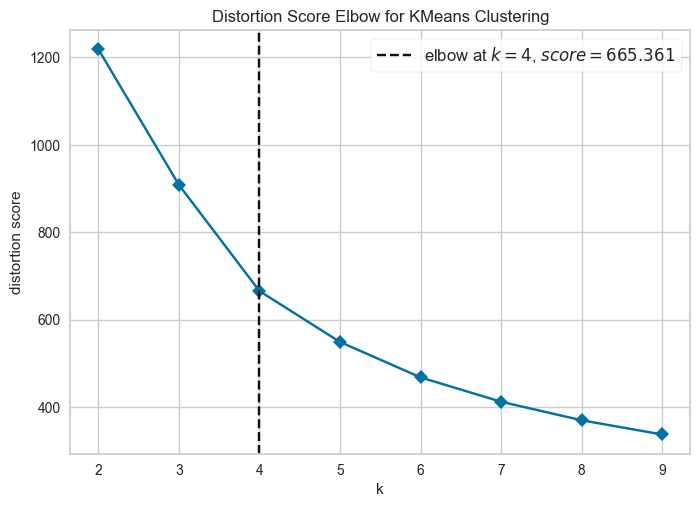

Silhouette Score untuk k=4: 0.447


In [69]:
#scalling dulu
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# 🔹 4. Gunakan KElbowVisualizer untuk mencari jumlah cluster optimal
kmeans = KMeans(random_state=42, n_init=10)

visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric="distortion", timings=False)
visualizer.fit(features_scaled)  # 🔥 Gunakan data yang sudah dinormalisasi
visualizer.show()

# 🔹 5. Ambil jumlah cluster optimal dari Elbow
optimal_k = visualizer.elbow_value_

# 🔹 6. Jalankan K-Means dengan jumlah cluster optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_optimal.fit_predict(features_scaled)

# 🔹 7. Evaluasi Silhouette Score
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f"Silhouette Score untuk k={optimal_k}: {silhouette_avg:.3f}")

hasilnya tidak terlalu baik dengan hanya memperoleh Silhouette Score untuk k=4: 0.447

**3. Clustering dengan harga di scalling**

In [70]:
features

,harga,jumlah_kamar,luas_tanah,kecamatan
0,6.900000e+09,5.0,420,8
1,4.500000e+09,3.0,190,8
2,3.950000e+09,3.0,132,8
3,3.300000e+09,4.0,220,8
4,3.500000e+09,3.0,180,8
...,...,...,...,...
29415,3.300000e+09,3.0,300,2
29416,4.000000e+09,8.0,330,2
29417,2.200000e+09,3.0,160,2
29418,1.950000e+09,3.0,120,2


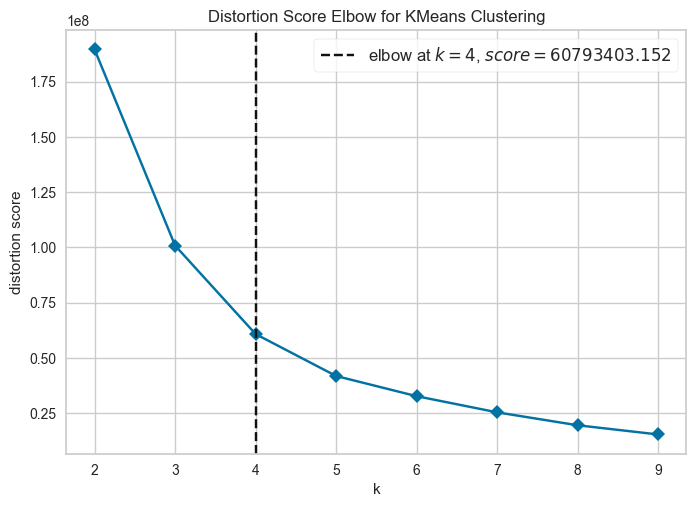

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [71]:
# Buat salinan data asli
features_scaled = features.copy()  # ✅ Pastikan ini DataFrame

# 🔹 Scaling hanya untuk kolom 'harga'
scaler = MinMaxScaler()
features_scaled[['harga']] = scaler.fit_transform(features[['harga']])  # ✅ Fix indexing

# 🔹 Gunakan KElbowVisualizer untuk menentukan jumlah cluster optimal
kmeans = KMeans(random_state=42, n_init=10)

visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric="distortion", timings=False)
visualizer.fit(features_scaled)  # 🔥 Gunakan data yang sudah di-scale
visualizer.show()

In [72]:
# 🔹 5. Ambil jumlah cluster optimal dari Elbow
optimal_k = visualizer.elbow_value_

# 🔹 6. Jalankan K-Means dengan jumlah cluster optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_optimal.fit_predict(features_scaled)

# 🔹 7. Evaluasi Silhouette Score
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f"Silhouette Score untuk k={optimal_k}: {silhouette_avg:.3f}")

Silhouette Score untuk k=4: 0.608


Clustering dengan harga saja yang di scalling hasilnya cukup baik daripada semua feature di scalling dengan nilai silhouette score : 0,608 

**4. Clustering dengan harga & luas_tanah di scalling**

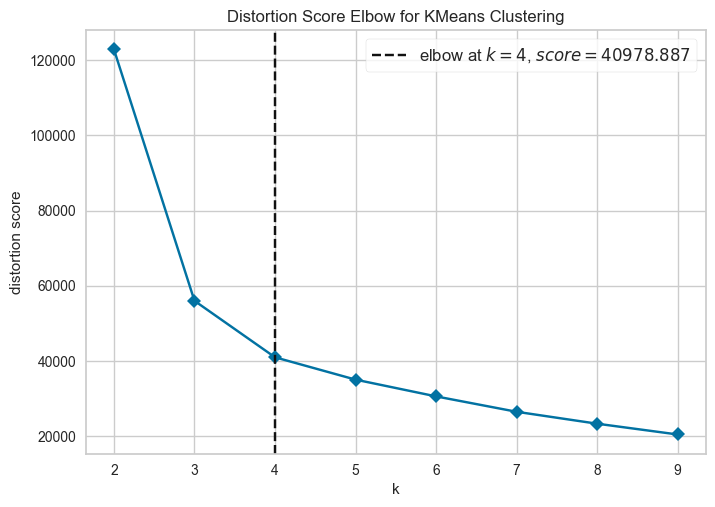

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [73]:
# Buat salinan data asli
features_scaled = features.copy()  # ✅ Pastikan ini DataFrame

# 🔹 Scaling hanya untuk kolom 'harga'
scaler = MinMaxScaler()
features_scaled[['harga','luas_tanah']] = scaler.fit_transform(features[['harga', 'luas_tanah']])  # ✅ Fix indexing

# 🔹 Gunakan KElbowVisualizer untuk menentukan jumlah cluster optimal
kmeans = KMeans(random_state=42, n_init=10)

visualizer = KElbowVisualizer(kmeans, k=(2, 10), metric="distortion", timings=False)
visualizer.fit(features_scaled)  # 🔥 Gunakan data yang sudah di-scale
visualizer.show()

In [74]:
# 🔹 5. Ambil jumlah cluster optimal dari Elbow
optimal_k = visualizer.elbow_value_

# 🔹 6. Jalankan K-Means dengan jumlah cluster optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_optimal.fit_predict(features_scaled)

# 🔹 7. Evaluasi Silhouette Score
silhouette_avg = silhouette_score(features_scaled, clusters)
print(f"Silhouette Score untuk k={optimal_k}: {silhouette_avg:.3f}")

Silhouette Score untuk k=4: 0.551


Clustering dengan harga dan luas tanah saja yang di scalling hasilnya cukup baik daripada semua feature di scalling tapi lebih buruk dibandingkan dengan harga saja yang di scalling,  dengan nilai silhouette score : 0.551

### **Rekap hasil eksperimen**

**1. Inisiasi Clustering : Menggunakan Semua Features & Elbow Method**

**Silhouette Score** : 0.652

**2. Clustering dengan 5 features (harga , jumlah_kamar, jumlah_kamarmandi, luas_tanah, kecamatan_encode)**

**Silhouette Score :**
- full Scalling : 0.380
- harga scalling : 0.608
- harga & luas_tanah Scalling : 0.482

**3.Clustering dengan 4 features (harga , jumlah_kamar, luas_tanah, kecamatan_encode)**

**Silhouette Score :**
- Tanpa Scalling : 0.652
- full Scalling : 0.447
- harga scalling : 0.608
- harga & luas_tanah Scalling : 0.551

In [75]:
df_copy

,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,harga_permeter,kecamatan,kabupaten,provinsi,harga_log
0,6.900000e+09,5.0,5.0,420,2552,8,0,0,22.654787
1,4.500000e+09,3.0,3.0,190,759,8,0,0,22.227343
2,3.950000e+09,3.0,3.0,132,4023,8,0,0,22.096981
3,3.300000e+09,4.0,3.0,220,2067,8,0,0,21.917188
4,3.500000e+09,3.0,2.0,180,3693,8,0,0,21.976029
...,...,...,...,...,...,...,...,...,...
29415,3.300000e+09,3.0,3.0,300,2730,2,0,0,21.917188
29416,4.000000e+09,8.0,4.0,330,4381,2,0,0,22.109560
29417,2.200000e+09,3.0,2.0,160,2067,2,0,0,21.511723
29418,1.950000e+09,3.0,2.0,120,2724,2,0,0,21.391095


### **Kesimpulan Clustering**
dengan melihat beberapa eksperimen yang sudah dilakukan sebelumnya, clustering dengan silhouette score terbaik adalah tahap inisiasi clustering dengan menggunakan semua feature yaitu :

1. harga
2. jumlah_kamar
3. jumlah_kamarmandi
4. luas_tanah
5. harga_permeter
6. kecamatan
7. kabupaten
8. provinsi
9. harga_log

jadi untuk clustering final kita akan menggunakan ke 9 features ini guys :D

In [76]:
df_copy.head()

,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,harga_permeter,kecamatan,kabupaten,provinsi,harga_log
0,6.900000e+09,5.0,5.0,420,2552,8,0,0,22.654787
1,4.500000e+09,3.0,3.0,190,759,8,0,0,22.227343
2,3.950000e+09,3.0,3.0,132,4023,8,0,0,22.096981
3,3.300000e+09,4.0,3.0,220,2067,8,0,0,21.917188
4,3.500000e+09,3.0,2.0,180,3693,8,0,0,21.976029


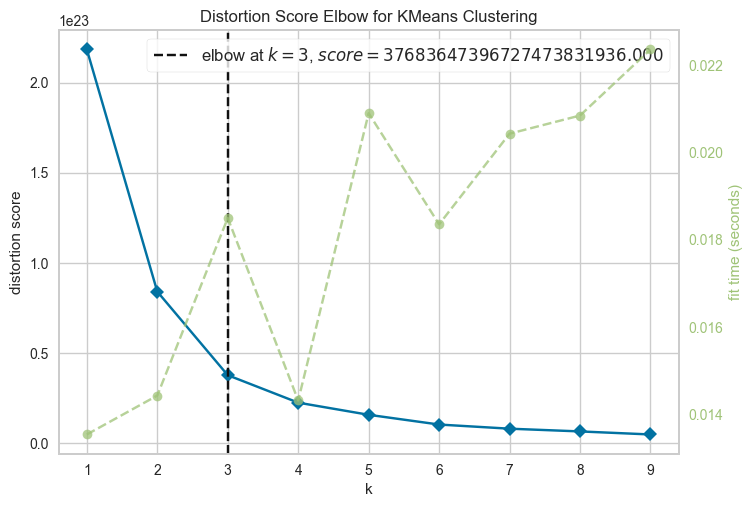

Silhouette Score untuk k=3: 0.652


In [77]:
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(df_copy)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

optimal_k = visualizer.elbow_value_

# 🔹 6. Jalankan K-Means dengan jumlah cluster optimal
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42,init='k-means++', n_init='auto')
clusters = kmeans_optimal.fit_predict(df_copy)

# 🔹 7. Evaluasi Silhouette Score
silhouette_avg = silhouette_score(df_copy, clusters)
print(f"Silhouette Score untuk k={optimal_k}: {silhouette_avg:.3f}")

In [78]:
labels = kmeans_optimal.labels_

In [79]:
df['Cluster'] = labels

C:\Users\tugas\AppData\Local\Temp\ipykernel_26532\1147590171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = labels


In [80]:
df

,link_penjualan,lokasi_rumah,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,harga_permeter,kecamatan,kabupaten,provinsi,harga_log,Cluster
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",6.900000e+09,5.0,5.0,420,Rp 20.720.721 per m²,Gading Serpong,Tangerang Selatan,Banten,22.654787,0
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",4.500000e+09,3.0,3.0,190,Rp 12.747.875 per m²,Gading Serpong,Tangerang Selatan,Banten,22.227343,0
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.950000e+09,3.0,3.0,132,Rp 30.859.375 per m²,Gading Serpong,Tangerang Selatan,Banten,22.096981,0
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.300000e+09,4.0,3.0,220,Rp 18.333.333 per m²,Gading Serpong,Tangerang Selatan,Banten,21.917188,1
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.500000e+09,3.0,2.0,180,Rp 27.777.778 per m²,Gading Serpong,Tangerang Selatan,Banten,21.976029,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29415,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",3.300000e+09,3.0,3.0,300,Rp 21.710.526 per m²,Bintaro,Tangerang Selatan,Banten,21.917188,1
29416,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",4.000000e+09,8.0,4.0,330,Rp 36.363.636 per m²,Bintaro,Tangerang Selatan,Banten,22.109560,0
29417,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",2.200000e+09,3.0,2.0,160,Rp 18.333.333 per m²,Bintaro,Tangerang Selatan,Banten,21.511723,1
29418,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",1.950000e+09,3.0,2.0,120,Rp 21.666.667 per m²,Bintaro,Tangerang Selatan,Banten,21.391095,1


**mapping cluster**

0 -> 1

1 -> 2

2 -> 3


In [81]:
df['Cluster'] = df['Cluster'].map({
    0: 1,  # Ubah cluster 0 jadi 1
    1: 2,  # Ubah cluster 1 jadi 2
    2: 3   # Ubah cluster 2 jadi 3
})

C:\Users\tugas\AppData\Local\Temp\ipykernel_26532\4180185161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = df['Cluster'].map({


In [82]:
df

,link_penjualan,lokasi_rumah,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,harga_permeter,kecamatan,kabupaten,provinsi,harga_log,Cluster
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",6.900000e+09,5.0,5.0,420,Rp 20.720.721 per m²,Gading Serpong,Tangerang Selatan,Banten,22.654787,1
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",4.500000e+09,3.0,3.0,190,Rp 12.747.875 per m²,Gading Serpong,Tangerang Selatan,Banten,22.227343,1
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.950000e+09,3.0,3.0,132,Rp 30.859.375 per m²,Gading Serpong,Tangerang Selatan,Banten,22.096981,1
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.300000e+09,4.0,3.0,220,Rp 18.333.333 per m²,Gading Serpong,Tangerang Selatan,Banten,21.917188,2
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.500000e+09,3.0,2.0,180,Rp 27.777.778 per m²,Gading Serpong,Tangerang Selatan,Banten,21.976029,2
...,...,...,...,...,...,...,...,...,...,...,...,...
29415,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",3.300000e+09,3.0,3.0,300,Rp 21.710.526 per m²,Bintaro,Tangerang Selatan,Banten,21.917188,2
29416,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",4.000000e+09,8.0,4.0,330,Rp 36.363.636 per m²,Bintaro,Tangerang Selatan,Banten,22.109560,1
29417,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",2.200000e+09,3.0,2.0,160,Rp 18.333.333 per m²,Bintaro,Tangerang Selatan,Banten,21.511723,2
29418,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",1.950000e+09,3.0,2.0,120,Rp 21.666.667 per m²,Bintaro,Tangerang Selatan,Banten,21.391095,2


In [83]:
df[df['Cluster']==1].sample(5)

,link_penjualan,lokasi_rumah,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,harga_permeter,kecamatan,kabupaten,provinsi,harga_log,Cluster
29052,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",8.250000e+09,5.0,3.0,400,Rp 32.352.941 per m²,Bintaro,Tangerang Selatan,Banten,22.833479,1
9545,https://www.rumah.com/listing-properti/dijual-...,"BSD, Tangerang Selatan, Banten",6.000000e+09,4.0,3.0,350,Rp 20.338.983 per m²,BSD,Tangerang Selatan,Banten,22.515025,1
11201,https://www.rumah.com/listing-properti/dijual-...,"Villa Cinere Mas, Ciputat Timur, Tangerang Sel...",5.300000e+09,4.0,3.0,335,Rp 11.777.778 per m²,Ciputat Timur,Tangerang Selatan,Banten,22.390973,1
3611,https://www.rumah.com/listing-properti/dijual-...,"BSD, Tangerang Selatan, Banten",6.800000e+09,4.0,4.0,275,Rp 22.666.667 per m²,BSD,Tangerang Selatan,Banten,22.640188,1
209,https://www.rumah.com/listing-properti/dijual-...,"De Park BSD, BSD, Tangerang Selatan, Banten",4.700000e+09,5.0,5.0,180,Rp 23.500.000 per m²,BSD,Tangerang Selatan,Banten,22.270828,1


In [84]:
df[df['Cluster']==2].sample(5)

,link_penjualan,lokasi_rumah,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,harga_permeter,kecamatan,kabupaten,provinsi,harga_log,Cluster
19893,https://www.rumah.com/listing-properti/dijual-...,"Dijual Rumah Siap Huni, Bintaro, Tangerang Sel...",8.500000e+08,2.0,1.0,65,Rp 10.493.827 per m²,Bintaro,Tangerang Selatan,Banten,20.560747,2
15755,https://www.rumah.com/listing-properti/dijual-...,"Maleo Bintaro Jaya, Bintaro, Tangerang Selatan...",3.500000e+09,5.0,3.0,250,Rp 19.662.921 per m²,Bintaro,Tangerang Selatan,Banten,21.976029,2
9142,https://www.rumah.com/listing-properti/dijual-...,". Jl. Raya Lapan, BSD, Tangerang Selatan, Banten",2.700000e+09,3.0,3.0,260,Rp 21.093.750 per m²,BSD,Tangerang Selatan,Banten,21.716518,2
11933,https://www.rumah.com/listing-properti/dijual-...,"cluster emerald, Serpong, Tangerang Selatan, B...",8.500000e+08,3.0,1.0,60,Rp 9.444.444 per m²,Serpong,Tangerang Selatan,Banten,20.560747,2
14413,https://www.rumah.com/listing-properti/dijual-...,"Medang, Kabupaten Tangerang, Banten, Gading Se...",2.344890e+09,3.0,2.0,92,Rp 27.915.357 per m²,Gading Serpong,Tangerang Selatan,Banten,21.575504,2


In [85]:
df[df['Cluster']==3].sample(5)

,link_penjualan,lokasi_rumah,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,harga_permeter,kecamatan,kabupaten,provinsi,harga_log,Cluster
22908,https://www.rumah.com/listing-properti/dijual-...,"Bintaro Jaya Sektor 9, Bintaro, Tangerang Sela...",1.400000e+10,3.0,3.0,250,Rp 32.786.885 per m²,Bintaro,Tangerang Selatan,Banten,23.362323,3
20285,https://www.rumah.com/listing-properti/dijual-...,"Bintaro Sektor 3, Bintaro, Tangerang Selatan, ...",1.080000e+10,7.0,5.0,740,Rp 14.937.759 per m²,Bintaro,Tangerang Selatan,Banten,23.102812,3
27321,https://www.rumah.com/listing-properti/dijual-...,"BSD, Tangerang Selatan, Banten",1.050000e+10,4.0,4.0,285,Rp 31.437.126 per m²,BSD,Tangerang Selatan,Banten,23.074641,3
10229,https://www.rumah.com/listing-properti/dijual-...,"Taman Tirta Golf BSD City, BSD, Tangerang Sela...",1.500000e+10,7.0,8.0,1000,Rp 21.186.441 per m²,BSD,Tangerang Selatan,Banten,23.431316,3
22534,https://www.rumah.com/listing-properti/dijual-...,"Bintaro Sektor 9, Bintaro, Tangerang Selatan, ...",1.650000e+10,5.0,5.0,600,Rp 28.645.833 per m²,Bintaro,Tangerang Selatan,Banten,23.526626,3


In [86]:
# 🔹 Pastikan kolom 'Cluster' ada
if 'Cluster' not in df.columns:
    raise ValueError("Kolom 'Cluster' tidak ditemukan di DataFrame!")

# 🔹 Cek tipe data Cluster (harus integer)
df['Cluster'] = df['Cluster'].astype(int)

# 🔹 Cek nilai unik dalam Cluster
print("Cluster unik:", df['Cluster'].unique())

# 🔹 Group by berdasarkan Cluster
cluster_group = df.groupby('Cluster')

# 🔹 Fungsi untuk mencari modus (nilai yang paling sering muncul)
def find_mode(series):
    return series.mode()[0] if not series.mode().empty else None

# 🔹 Looping untuk menampilkan hasil per Cluster
for cluster in df['Cluster'].unique():  # Pastikan loop sesuai data
    data = cluster_group.get_group(cluster)  # Ambil data berdasarkan cluster
    print(f"\n📌 **Cluster {cluster}**")
    print("=" * 40)
    
    # 🔹 1. Jumlah data per cluster
    print(f"Jumlah Data: {len(data)}")
    
    # 🔹 2. Min, Max, Mean untuk Harga, Jumlah Kamar, Jumlah Kamar Mandi, Luas Tanah
    for col in ['harga', 'jumlah_kamar', 'jumlah_kamarmandi', 'luas_tanah']:
        print(f"{col.capitalize()} - Min: {data[col].min()}, Max: {data[col].max()}, Mean: {data[col].mean():.2f}")
    
    # 🔹 3. Modus untuk harga_permeter & kecamatan
    print(f"Modus Harga per Meter: {find_mode(data['harga_permeter'])}")
    print(f"Modus Kecamatan: {find_mode(data['kecamatan'])}")
    
    print("=" * 40)

Cluster unik: [1 2 3]

📌 **Cluster 1**
Jumlah Data: 5734
Harga - Min: 3949950000.0, Max: 10200000000.0, Mean: 5955636329.14
Jumlah_kamar - Min: 1.0, Max: 10.0, Mean: 4.71
Jumlah_kamarmandi - Min: 1.0, Max: 10.0, Mean: 4.00
Luas_tanah - Min: 1, Max: 3000, Mean: 301.18
Modus Harga per Meter: Rp 25.000.000 per m²
Modus Kecamatan: Bintaro

📌 **Cluster 2**
Jumlah Data: 16950
Harga - Min: 250000000.0, Max: 3930000000.0, Mean: 1921141729.94
Jumlah_kamar - Min: 1.0, Max: 10.0, Mean: 3.34
Jumlah_kamarmandi - Min: 1.0, Max: 10.0, Mean: 2.54
Luas_tanah - Min: 1, Max: 2140, Mean: 121.28
Modus Harga per Meter: Rp 10.000.000 per m²
Modus Kecamatan: Bintaro

📌 **Cluster 3**
Jumlah Data: 861
Harga - Min: 10300000000.0, Max: 24000000000.0, Mean: 14513832525.57
Jumlah_kamar - Min: 1.0, Max: 10.0, Mean: 5.58
Jumlah_kamarmandi - Min: 1.0, Max: 10.0, Mean: 5.06
Luas_tanah - Min: 41, Max: 1600, Mean: 547.89
Modus Harga per Meter: Rp 23.291.925 per m²
Modus Kecamatan: BSD


C:\Users\tugas\AppData\Local\Temp\ipykernel_26532\2935495560.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = df['Cluster'].astype(int)


**kesimpulan Clustering**

* menggunakan nilai **k = 3**
* memperoleh Silhouette Score untuk k=3: **0.652**

**Distribusi Cluster**
* cluster 1 -> 5734 data 
* cluster 3 -> 16950 data
* cluster 3 -> 861 data


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [87]:
df

,link_penjualan,lokasi_rumah,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,harga_permeter,kecamatan,kabupaten,provinsi,harga_log,Cluster
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",6.900000e+09,5.0,5.0,420,Rp 20.720.721 per m²,Gading Serpong,Tangerang Selatan,Banten,22.654787,1
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",4.500000e+09,3.0,3.0,190,Rp 12.747.875 per m²,Gading Serpong,Tangerang Selatan,Banten,22.227343,1
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.950000e+09,3.0,3.0,132,Rp 30.859.375 per m²,Gading Serpong,Tangerang Selatan,Banten,22.096981,1
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.300000e+09,4.0,3.0,220,Rp 18.333.333 per m²,Gading Serpong,Tangerang Selatan,Banten,21.917188,2
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.500000e+09,3.0,2.0,180,Rp 27.777.778 per m²,Gading Serpong,Tangerang Selatan,Banten,21.976029,2
...,...,...,...,...,...,...,...,...,...,...,...,...
29415,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",3.300000e+09,3.0,3.0,300,Rp 21.710.526 per m²,Bintaro,Tangerang Selatan,Banten,21.917188,2
29416,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",4.000000e+09,8.0,4.0,330,Rp 36.363.636 per m²,Bintaro,Tangerang Selatan,Banten,22.109560,1
29417,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",2.200000e+09,3.0,2.0,160,Rp 18.333.333 per m²,Bintaro,Tangerang Selatan,Banten,21.511723,2
29418,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",1.950000e+09,3.0,2.0,120,Rp 21.666.667 per m²,Bintaro,Tangerang Selatan,Banten,21.391095,2


**1. Distribusi CLuster pada data**

C:\Users\tugas\AppData\Local\Temp\ipykernel_26532\1434700747.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


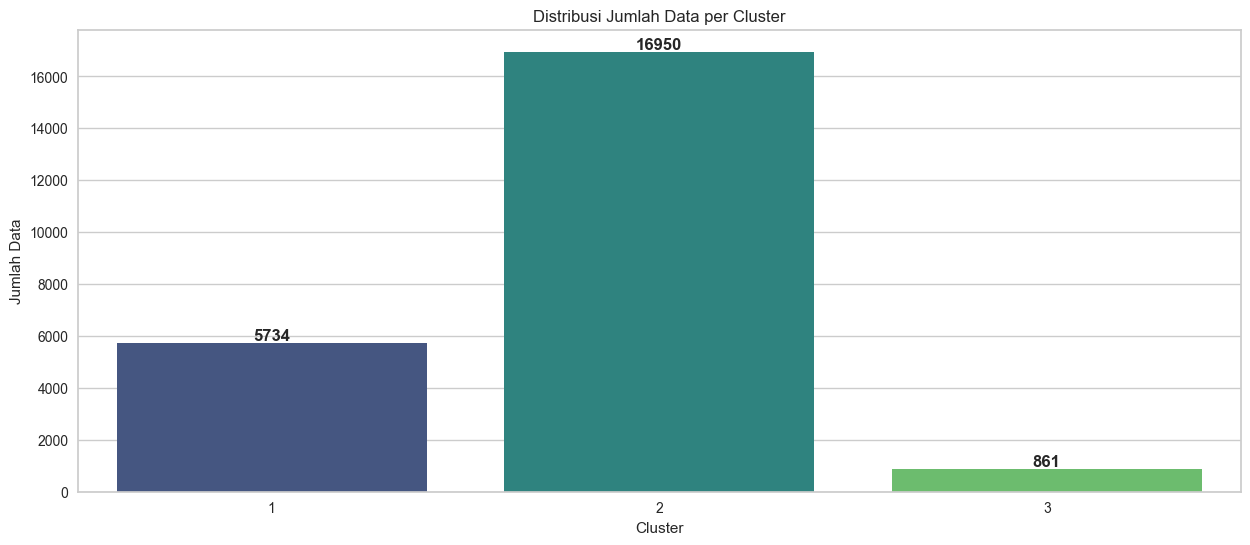

In [88]:
# Hitung jumlah data per cluster
cluster_counts = df['Cluster'].value_counts().sort_index()

# Plot
plt.figure(figsize=(15, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")

# Tambahkan label
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Jumlah Data per Cluster")
plt.xticks(rotation=0)

# Tampilkan nilai di atas bar
for i, val in enumerate(cluster_counts.values):
    plt.text(i, val + 100, str(val), ha='center', fontsize=12, fontweight='bold')

plt.show()


**2. Distribusi Cluster terhadap harga & luas_tanah**

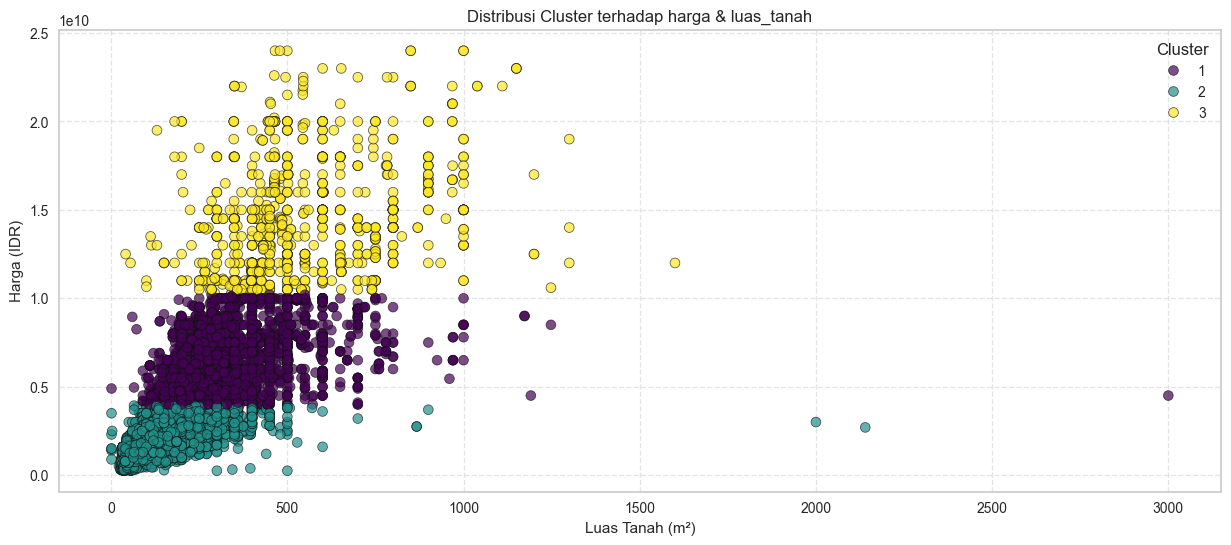

In [89]:
plt.figure(figsize=(15, 6))

# Scatter plot dengan warna berdasarkan cluster
sns.scatterplot(data=df, 
                x='luas_tanah', 
                y='harga', 
                hue='Cluster',  # 🔹 Warna berdasarkan Cluster
                palette='viridis', 
                alpha=0.7, 
                edgecolor='k')

plt.xlabel("Luas Tanah (m²)")
plt.ylabel("Harga (IDR)")
plt.title("Distribusi Cluster terhadap harga & luas_tanah")

plt.grid(True, linestyle="--", alpha=0.5)  # Grid untuk tampilan lebih rapi
plt.legend(title="Cluster")  # Tambahkan legenda untuk cluster
plt.show()


**3. Rata-rata harga rumah per clusternya**

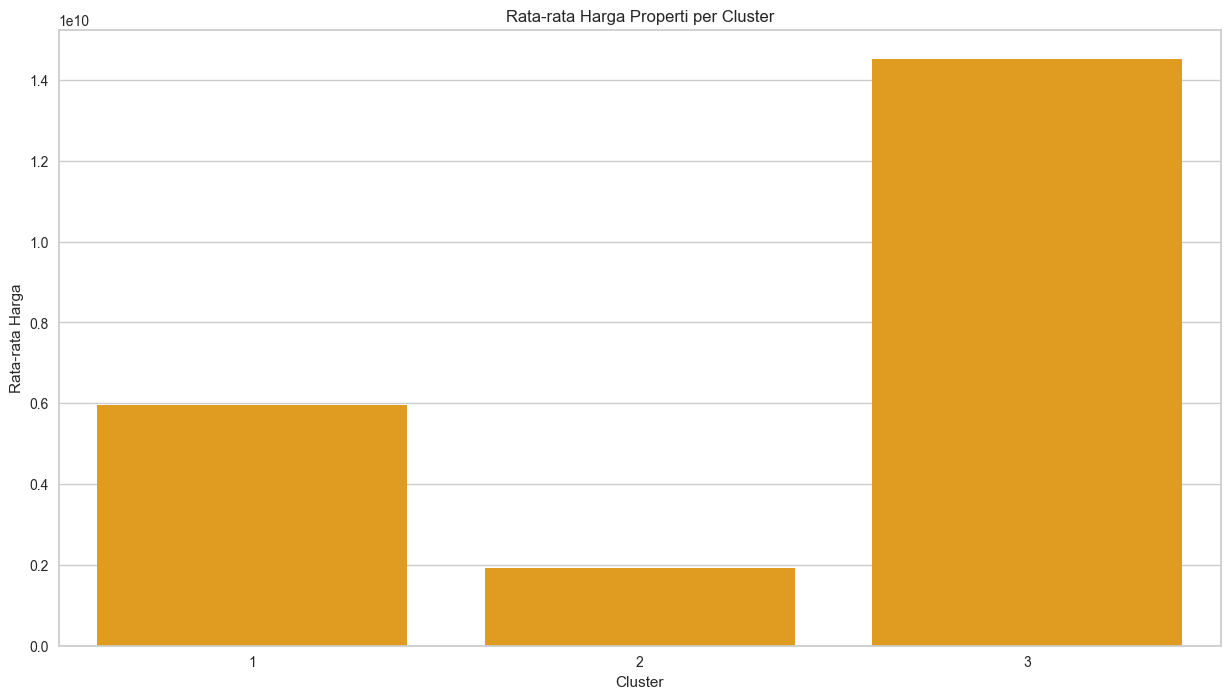

In [90]:
plt.figure(figsize=(15, 8))
sns.barplot(x=df.groupby('Cluster')['harga'].mean().index, 
            y=df.groupby('Cluster')['harga'].mean().values, 
            color= 'orange')

plt.xlabel("Cluster")
plt.ylabel("Rata-rata Harga")
plt.title("Rata-rata Harga Properti per Cluster")
plt.xticks(rotation=0)

plt.show()


**4. Distribusi luas tanah per cluster**

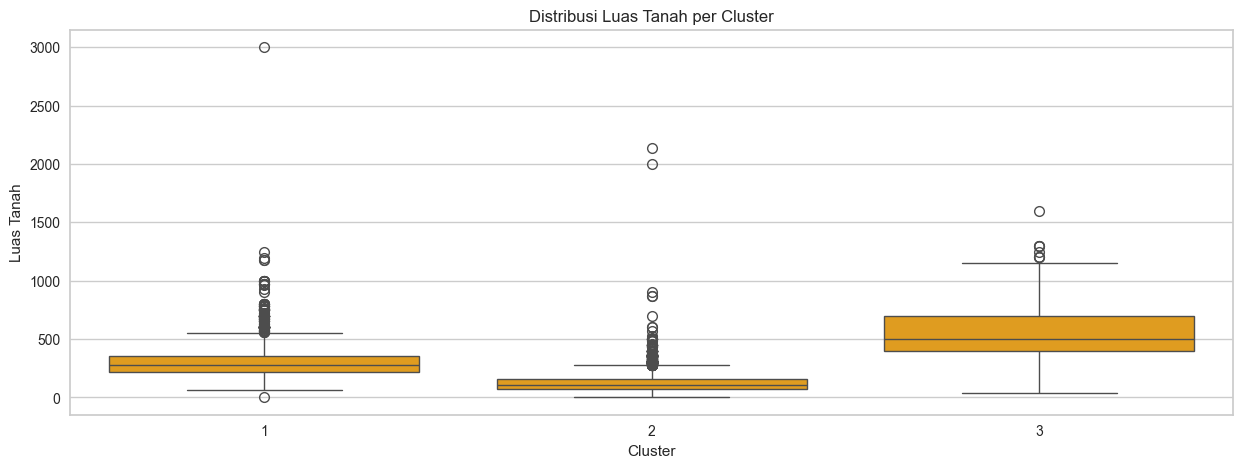

In [91]:
plt.figure(figsize=(15, 5))
sns.boxplot(x=df['Cluster'], y=df['luas_tanah'], color= 'orange')

plt.xlabel("Cluster")
plt.ylabel("Luas Tanah")
plt.title("Distribusi Luas Tanah per Cluster")

plt.show()


**5. Distribusi harga per cluster**

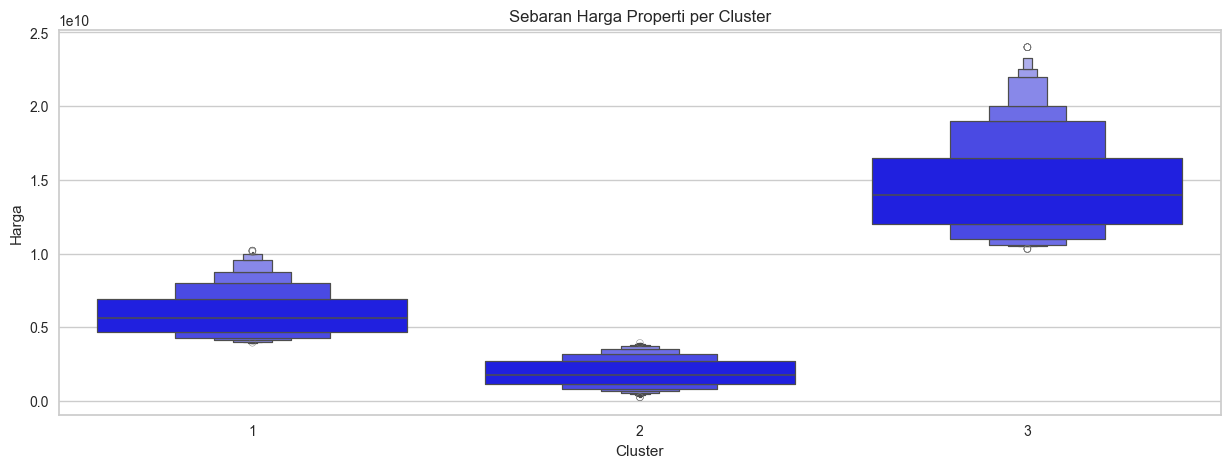

In [92]:
plt.figure(figsize=(15, 5))
sns.boxenplot(x=df['Cluster'], y=df['harga'], color="blue")

plt.xlabel("Cluster")
plt.ylabel("Harga")
plt.title("Sebaran Harga Properti per Cluster")

plt.show()


**6. Distribusi Cluster berdasarkan Kecamatan dan Harga Rumah**

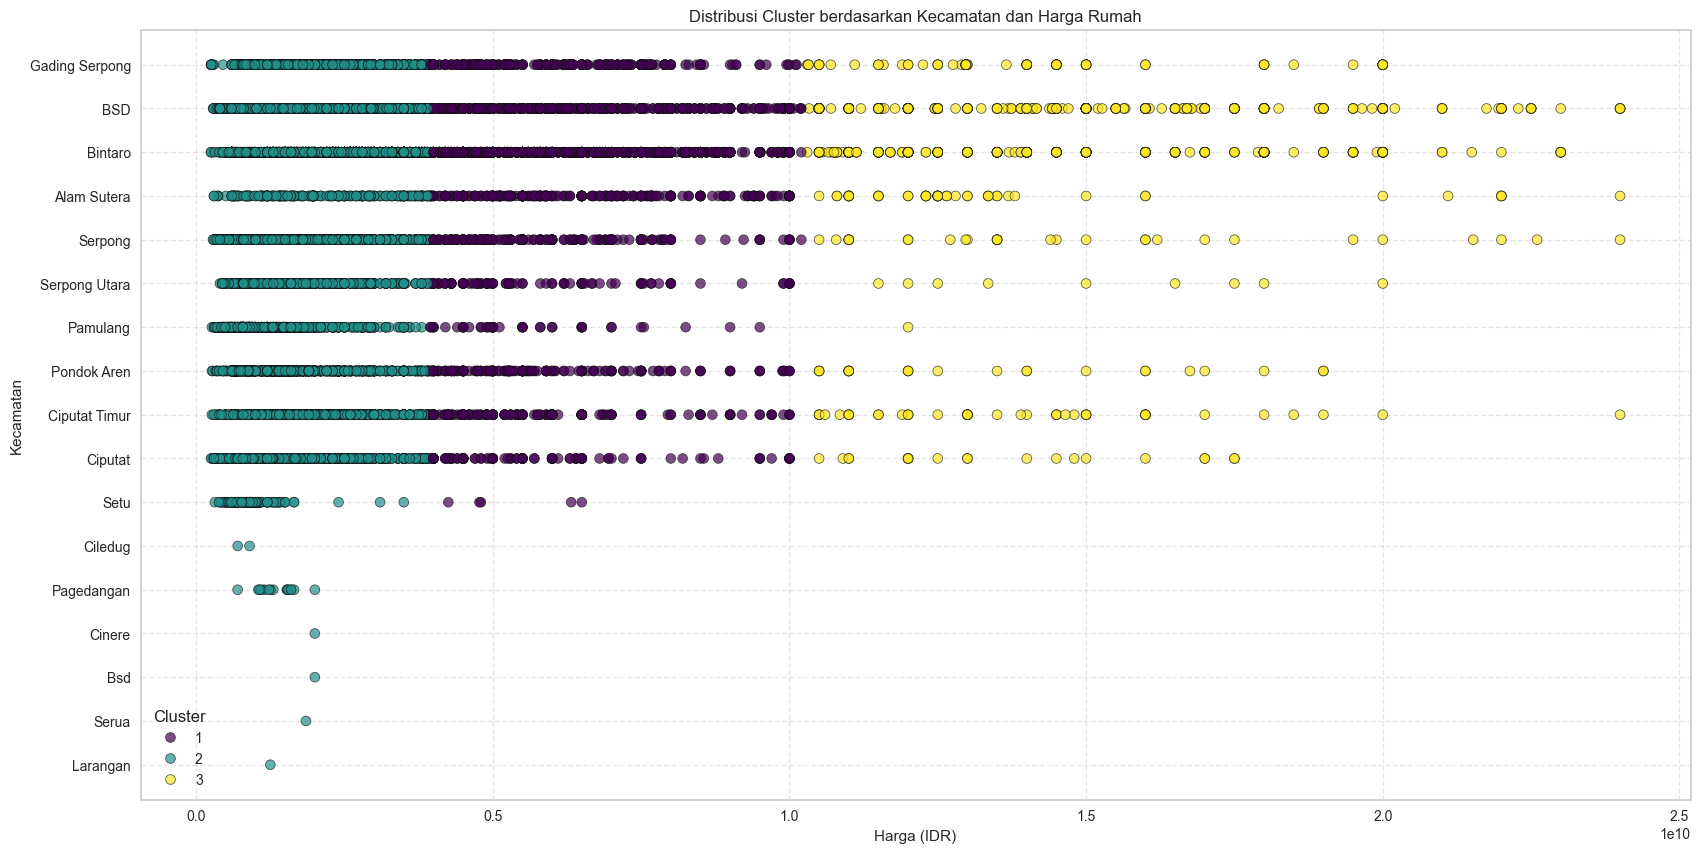

In [93]:
plt.figure(figsize=(20, 10))

# Scatter plot dengan warna berdasarkan cluster
sns.scatterplot(data=df, 
                y='kecamatan', 
                x='harga', 
                hue='Cluster',  # 🔹 Warna berdasarkan Cluster
                palette='viridis', 
                alpha=0.7, 
                edgecolor='k')

plt.xlabel("Harga (IDR)")
plt.ylabel("Kecamatan")
plt.title("Distribusi Cluster berdasarkan Kecamatan dan Harga Rumah")

plt.grid(True, linestyle="--", alpha=0.5)  # Grid untuk tampilan lebih rapi
plt.legend(title="Cluster")  # Tambahkan legenda untuk cluster
plt.show()


**7. Kecamatan yang sering muncul di setiap Cluster**

In [94]:
top_kecamatan_per_cluster = df.groupby("Cluster")["kecamatan"].agg(lambda x: x.mode().head(3))

print("Kecamatan Tersering Muncul per Cluster:\n", top_kecamatan_per_cluster)


Kecamatan Tersering Muncul per Cluster:
 Cluster
1    Bintaro
2    Bintaro
3        BSD
Name: kecamatan, dtype: object


**8. Distribusi Cluster Berdasarkan Harga dan Jumlah Kamar**

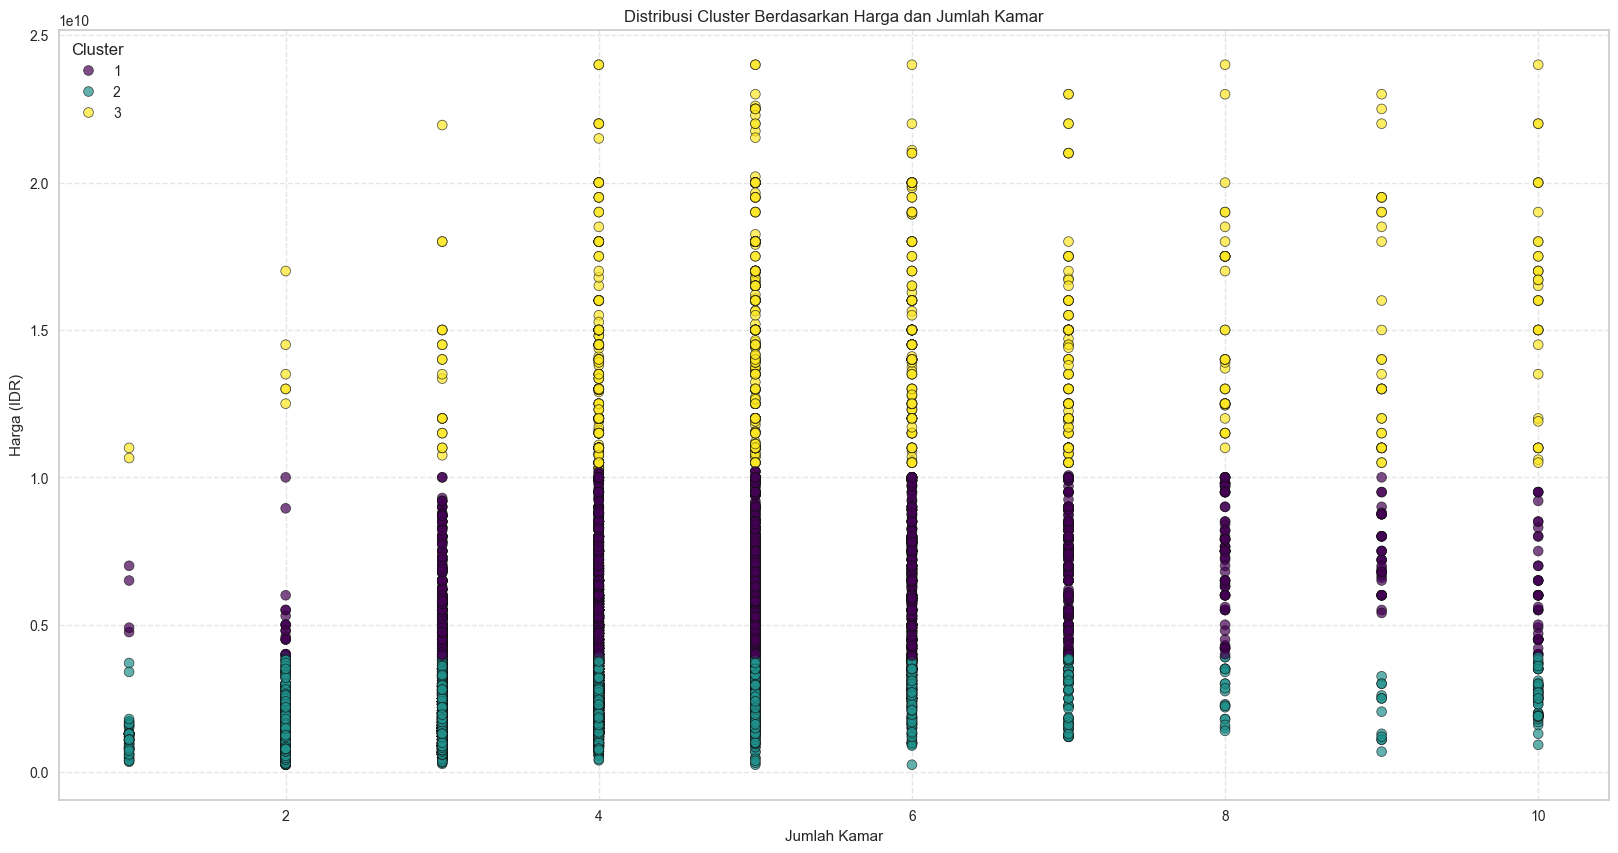

In [95]:
plt.figure(figsize=(20, 10))

# Scatter plot dengan warna berdasarkan cluster
sns.scatterplot(data=df, 
                x='jumlah_kamar', 
                y='harga', 
                hue='Cluster',  # 🔹 Warna berdasarkan Cluster
                palette='viridis', 
                alpha=0.7, 
                edgecolor='k')

plt.xlabel("Jumlah Kamar")
plt.ylabel("Harga (IDR)")
plt.title("Distribusi Cluster Berdasarkan Harga dan Jumlah Kamar")

plt.grid(True, linestyle="--", alpha=0.5)  # Grid untuk tampilan lebih rapi
plt.legend(title="Cluster")  # Tambahkan legenda untuk cluster
plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [96]:
df

,link_penjualan,lokasi_rumah,harga,jumlah_kamar,jumlah_kamarmandi,luas_tanah,harga_permeter,kecamatan,kabupaten,provinsi,harga_log,Cluster
0,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",6.900000e+09,5.0,5.0,420,Rp 20.720.721 per m²,Gading Serpong,Tangerang Selatan,Banten,22.654787,1
1,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",4.500000e+09,3.0,3.0,190,Rp 12.747.875 per m²,Gading Serpong,Tangerang Selatan,Banten,22.227343,1
2,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.950000e+09,3.0,3.0,132,Rp 30.859.375 per m²,Gading Serpong,Tangerang Selatan,Banten,22.096981,1
3,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.300000e+09,4.0,3.0,220,Rp 18.333.333 per m²,Gading Serpong,Tangerang Selatan,Banten,21.917188,2
4,https://www.rumah.com/listing-properti/dijual-...,"Gading Serpong, Tangerang Selatan, Banten",3.500000e+09,3.0,2.0,180,Rp 27.777.778 per m²,Gading Serpong,Tangerang Selatan,Banten,21.976029,2
...,...,...,...,...,...,...,...,...,...,...,...,...
29415,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",3.300000e+09,3.0,3.0,300,Rp 21.710.526 per m²,Bintaro,Tangerang Selatan,Banten,21.917188,2
29416,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",4.000000e+09,8.0,4.0,330,Rp 36.363.636 per m²,Bintaro,Tangerang Selatan,Banten,22.109560,1
29417,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",2.200000e+09,3.0,2.0,160,Rp 18.333.333 per m²,Bintaro,Tangerang Selatan,Banten,21.511723,2
29418,https://www.rumah.com/listing-properti/dijual-...,"Bintaro, Tangerang Selatan, Banten",1.950000e+09,3.0,2.0,120,Rp 21.666.667 per m²,Bintaro,Tangerang Selatan,Banten,21.391095,2


In [97]:
# Pastikan kolom 'Cluster' ada
if 'Cluster' not in df.columns:
    raise ValueError("Kolom 'Cluster' tidak ditemukan di DataFrame!")

# Cek tipe data Cluster (harus integer)
df['Cluster'] = df['Cluster'].astype(int)

# Cek nilai unik dalam Cluster
print("Cluster unik:", df['Cluster'].unique())

# Group by berdasarkan Cluster
cluster_group = df.groupby('Cluster')

# Fungsi untuk mencari tiga modus teratas dan membersihkan karakter tak diinginkan
def find_top3_modes(series):
    return [str(value).replace("\xa0", " ") for value in series.value_counts().nlargest(3).index.tolist()]

# Looping untuk menampilkan hasil per Cluster
for cluster in df['Cluster'].unique():
    data = cluster_group.get_group(cluster)  # Ambil data berdasarkan cluster
    print(f"\n📌 Cluster {cluster}")
    print("=" * 40)
    
    # 1. Jumlah data per cluster
    print(f"Jumlah Data: {len(data)}")
    
    # 2. Min, Max, Mean untuk Harga, Jumlah Kamar, Jumlah Kamar Mandi, Luas Tanah
    for col in ['harga', 'jumlah_kamar', 'jumlah_kamarmandi', 'luas_tanah']:
        print(f"{col.capitalize()} - Min: {data[col].min()}, || Max: {data[col].max()}, || Mean: {data[col].mean():.2f}")
    
    # 3. Modus untuk harga_permeter & kecamatan (3 kecamatan teratas)
    print(f"Modus Harga per Meter: {find_top3_modes(data['harga_permeter'])}")
    print(f"Top 3 Kecamatan: {find_top3_modes(data['kecamatan'])}")
    
    print("=" * 40)


Cluster unik: [1 2 3]

📌 Cluster 1
Jumlah Data: 5734
Harga - Min: 3949950000.0, || Max: 10200000000.0, || Mean: 5955636329.14
Jumlah_kamar - Min: 1.0, || Max: 10.0, || Mean: 4.71
Jumlah_kamarmandi - Min: 1.0, || Max: 10.0, || Mean: 4.00
Luas_tanah - Min: 1, || Max: 3000, || Mean: 301.18
Modus Harga per Meter: ['Rp 25.000.000 per m²', 'Rp 20.000.000 per m²', 'Rp 22.500.000 per m²']
Top 3 Kecamatan: ['Bintaro', 'BSD', 'Gading Serpong']

📌 Cluster 2
Jumlah Data: 16950
Harga - Min: 250000000.0, || Max: 3930000000.0, || Mean: 1921141729.94
Jumlah_kamar - Min: 1.0, || Max: 10.0, || Mean: 3.34
Jumlah_kamarmandi - Min: 1.0, || Max: 10.0, || Mean: 2.54
Luas_tanah - Min: 1, || Max: 2140, || Mean: 121.28
Modus Harga per Meter: ['Rp 10.000.000 per m²', 'Rp 16.666.667 per m²', 'Rp 20.000.000 per m²']
Top 3 Kecamatan: ['Bintaro', 'BSD', 'Pamulang']

📌 Cluster 3
Jumlah Data: 861
Harga - Min: 10300000000.0, || Max: 24000000000.0, || Mean: 14513832525.57
Jumlah_kamar - Min: 1.0, || Max: 10.0, || Mean: 

C:\Users\tugas\AppData\Local\Temp\ipykernel_26532\734312344.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = df['Cluster'].astype(int)


# 📊 **Analisis Cluster Harga Properti**

## Cluster Unik: [1, 2, 3]  

---

## 🟢 **Cluster 1: Properti Premium (Mid-High Range)**  
**Jumlah Data:** 5.734 properti  
- **Harga:** Rp 3,95 M – Rp 10,2 M (**Mean: Rp 5,96 M**)  
- **Jumlah Kamar:** Min: 1 | Max: 10 | Mean: 4.71  
- **Jumlah Kamar Mandi:** Min: 1 | Max: 10 | Mean: 4.00  
- **Luas Tanah:** 1 – 3.000 m² (**Mean: 301,18 m²**)  
- **Harga per Meter:** **Rp 25.000.000/m²**  
- **Lokasi Terpopuler:** **Bintaro, BSD, Gading Serpong**  

📌 **Analisis:**  
✅ Properti kelas menengah ke atas dengan luas tanah lebih besar.  
✅ Harga lebih tinggi dibanding Cluster 2, menunjukkan daya beli lebih kuat.  
✅ **Bintaro** mendominasi, menandakan permintaan tinggi di area tersebut.  

---

## 🟡 **Cluster 2: Properti Terjangkau (Mid-Low Range)**  
**Jumlah Data:** 16.950 properti  
- **Harga:** Rp 250 Juta – Rp 3,93 M (**Mean: Rp 1,92 M**)  
- **Jumlah Kamar:** Min: 1 | Max: 10 | Mean: 3.34  
- **Jumlah Kamar Mandi:** Min: 1 | Max: 10 | Mean: 2.54  
- **Luas Tanah:** 1 – 2.140 m² (**Mean: 121,28 m²**)  
- **Harga per Meter:** **Rp 10.000.000/m²**  
- **Lokasi Terpopuler:** **Bintaro, BSD, Pamulang**  

📌 **Analisis:**  
✅ Properti kelas menengah ke bawah, cocok untuk first-home buyers.  
✅ Harga lebih terjangkau, dengan luas tanah lebih kecil dibanding Cluster 1.  
✅ **Bintaro** tetap menjadi area favorit, menunjukkan variasi segmentasi harga di sana.  

---

## 🔴 **Cluster 3: Properti Mewah (High-End)**  
**Jumlah Data:** 861 properti  
- **Harga:** Rp 10,3 M – Rp 24 M (**Mean: Rp 14,51 M**)  
- **Jumlah Kamar:** Min: 1 | Max: 10 | Mean: 5.58  
- **Jumlah Kamar Mandi:** Min: 1 | Max: 10 | Mean: 5.06  
- **Luas Tanah:** 41 – 1.600 m² (**Mean: 547,89 m²**)  
- **Harga per Meter:** **Rp 23.291.925/m²**  
- **Lokasi Terpopuler:** **BSD, Bintaro, Gading Serpong**  

📌 **Analisis:**  
✅ Properti kelas atas dengan harga tinggi dan luas tanah besar.  


# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [98]:
df.to_csv('Dataset/Dataset_Clustering.csv', index= False)